# **Analysis of the Rate and Severity of Motor Vehicle Accidents in the United States**  

Kaelyn Gormley, James Giffin, Kate Johnston, Marwa Saleh





In [ ]:
#clone the github repository
Use_Google_Drive= False #@param {type:"boolean"}

if Use_Google_Drive:
    import os
    from google.colab import drive 

    drive.mount('/content/gdrive',force_remount=True)

    Working_Directory = 'My Drive' #@param {type:"string"}
    wd="/content/gdrive/"+Working_Directory
    os.chdir(wd)

    !git clone https://github.com/pard187/pard187.github.io
    
    %cd pard187.github.io/
    dirpath = os.getcwd()
    print("current directory is : " + dirpath)

    
else:
    !git clone https://github.com/pard187/pard187.github.io
    %cd pard187.github.io/

Cloning into 'pard187.github.io'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 244 (delta 15), reused 0 (delta 0), pack-reused 217
Receiving objects: 100% (244/244), 5.12 MiB | 28.50 MiB/s, done.
Resolving deltas: 100% (106/106), done.
/content/pard187.github.io


In [ ]:
#import libraries
import numpy as mp
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Part I. Business Understanding

Motor vehicle accidents is a leading cause of death and injury in the United States. The use of motor vehicles is steadily increasing in the United States, with the number of vehicle miles traveled increasing each year. As more and more Americans place their lives and wellbeing in the hands of traffic and motor vehicles, ensuring their safety becomes an issue of the utmost importance. In 2015 over 2.5 million individuals were treated in emergency departments for injuries resulting from motor vehicle crashes (CDC, 2020). In 2019 alone, the National Highway Traffic Safety Administration reported over 36,096 fatalities in motor vehicle accidents (NHTSA, 2020). In addition to posing a danger to the safety of the people, motor vehicle accidents are currently a financial drain on the United States government and economy. The CDC estimates that for crashes that occurred in 2017, the cost of medical care and productivity losses associated with occupant injuries and deaths from motor vehicle traffic crashes exceeded $75 billion (CDC, 2020). Furthermore, traffic safety has been the target of a significant amount of spending by the government and other organizations.

With this in mind, our group has decided to analyze data related to accidents in the United States with the goal of uncovering potential patterns in the occurrences of accidents. The specific questions we are looking to investigate are: **What conditions may make the risk of accidents higher?** and **What conditions impact the severity of accidents that occur?**  

This analysis has the potential to provide valuable insight for people and organizations who are working to decrease the risk of accidents in the United States. An understanding of factors that increase the risk and severity of motor vehicle accidents would allow these organizations to carry out targeted efforts to ameliorate those conditions. Such efforts not only have the potential to save lives, but also save money and allow for optimal use of funds.

# Part II. Data Understanding

In order to obtain insight on our question of causes of motor vehicle accidents in the United States, we will use two main datasets. The first dataset, US Accidents, provides data regarding accidents that have taken place across the contiguous United States. The second dataset, US Census Demographic Data, contains information regarding the population of each state and county in the United States. The latter dataset will be used to standardize the analysis of the occurrence of accidents across different sized states.

## US Accidents Dataset
The US-Accidents dataset (Moosavi, S., 2020) includes about 3.5 million instances of traffic accidents that took place all over the United States (except for the states of Alaska and Hawaii). The dataset was collected between February 2016 and June 2020 using two real-time traffic data collector APIs: MapQuest and MS-Bing. The two APIs capture data directly from traffic cameras and traffic sensors, in addition to collecting data from different entities, such as the US and State Departments of Transportation and law enforcement agencies. Data was being pulled every 90 seconds from 6am to 11pm and every 150 seconds from 11pm to 6am, covering the entire 24 hours of a day. <br> 
The integration process of the dataset involved removing any duplicates across the two API sources which resulted in the removal of about 1% of the original data. The dataset was augmented over four steps. First, reverse geo-coding was performed to translate all GPS coordinates into street addresses using a tool called Nominatim. Second, the dataset was augmented with weather data collected by the Weather Underground API. Third, the points of interest were defined; these are certain locations on a map—such pumps, crossings, stops, etc—which were located using the OpenStreetMap API. Finally, the data was augmented with the different periods of the day using the TimeAndDate API. <br>
The final dataset is composed of 49 columns as listed and described in the table below: 

Attribute | Data Type | Description | Nullable
--- | --- | --- | ---
Traffic Attributes (12)
ID | Categorical | A unique identifier of the accident record | No
Source | Categorical | Indicates source of the accident report (i.e. the API which reported the accident) | No
TMC | Numeric | A traffic accident may have a Traffic Message Channel (TMC) code which provides more detailed description of the event | Yes
Severity | Ordinal | Shows severity of the accident on a scale of 1-4 (1 indicates the least impact on traffic and 4 indicates a significant impact on traffic | No
Start_Time | Ordinal | Shows start time of the accident in the local time zone | No
End_Time | Ordinal | Shows end time of the accident in the local time zone | No
Start_Lat | Ordinal | Shows latitude in GPS coordinate of the start point | No
Start_Lng | Ordinal | Shows longitude in GPS coordinate of the start point | No
End_Lat | Ordinal | Shows latitude in GPS coordinate of the end point | Yes
End_Lng | Ordinal | Shows longitude in GPS coordinate of the end point | Yes
Distance(mi) | Ratio | The length of the road extent affected by the accident | No
Description | Categorical | Shows natural language description of the accident | No
Address Attributes (9)
Number | Categorical | Shows the street number in address field | Yes
Street | Categorical | Shows the street name in address field | Yes
Side | Categorical | Shows the relative side of the street (Right/Left) in address field | Yes
City | Categorical | Shows the city in address field | Yes
County | Categorical | Shows the county in address field | Yes
State | Categorical | Shows the state in address field | Yes
Zipcode | Categorical | Shows the zipcode in address field | Yes
Country | Categorical | Shows the country in address field | Yes
Timezone | Categorical | Shows timezone based on the location of the accident (eastern, central, etc.) | Yes
Weather Attributes (11)
Airport_Code | Categorical | Denotes an airport-based weather station which is the closest one to location of the accident | Yes
Weather_Timestamp | Ordinal | Shows the time-stamp of weather observation record (in local time) | Yes
Temperature(F) | Interval | Shows the time-stamp of weather observation record in local time | Yes
Wind_Chill(F) | Interval | Shows the wind chill in Fahrenheit | Yes
Humidity(%) | Interval | Shows the humidity in percentage | Yes
Pressure(in) | Interval | Shows air pressure in inches | Yes
Visibility(mi) | Interval | Shows visibility in miles  | Yes
Wind_Direction | Categorical | Shows wind direction | Yes
Wind_Speed| Ratio | Shows wind speed in miles per hour | Yes
Precipitation(in) | Ratio | Shows precipitation amount in inches | Yes
Weather_Condition | Categorical | Shows the weather condition (rain, snow, thunderstorm, fog, etc.) | Yes
Point of Interest (POI) Attributes (13)
Amenity | Categorical | A POI annotation which indicates presence of amenity in a nearby location | No
Bump | Categorical | A POI annotation which indicates presence of speed bump or hump in a nearby location | No
Crossing | Categorical | A POI annotation which indicates presence of crossing  in a nearby location | No
Give_Way | Categorical | A POI annotation which indicates presence of giveway sign in a nearby location | No
Junction | Categorical | A POI annotation which indicates presence of junction in a nearby location | No
No_Exit | Categorical | A POI annotation which indicates presence of no exit sign in a nearby location | No
Railway | Categorical | A POI annotation which indicates presence of railway in a nearby location | No
Roundabout | Categorical | A POI annotation which indicates presence of roundabout in a nearby location | No
Station | Categorical | A POI annotation which indicates presence of station (bus, train, etc.) in a nearby location | No
Stop | Categorical | A POI annotation which indicates presence of stop sign in a nearby location | No
Traffic_Calming | Categorical | A POI annotation which indicates presence of traffic calming means in a nearby location | No
Traffic_Signal | Categorical | A POI annotation which indicates presence of traffic signal in a nearby location | No
Turning_Loop | Categorical | A POI annotation which indicates presence of turning loop in a nearby location | No
Period-of-day Attributes(4)
Sunrise_Sunset | Categorical | Shows the period of day (i.e. day or night) based on sunrise/sunset | Yes
Civil_Twilight | Categorical | Shows the period of day (i.e. day or night) based on civil twilight | Yes
Nautical_Twilight | Categorical | Shows the period of day (i.e. day or night) based on nautical twilight | Yes
Astronomical_Twilight | Categorical | Shows the period of day (i.e. day or night) based on astronomical twilight | Yes


## US Census Demographic Dataset 

The US Census Demographic dataset (Neutrino, M., 2018) was collected from the American Community Survey (ACS) for the years 2015 and 2017. It covers all 52 states of America as well as DC and Puerto Rico. The dataset has two tables for each year and four tables in total. The first two tables are called acsxxxx_census_tract_data which contain data for all census tracts within the US. The second two tables are called acsxxxx_county_data which contain data for all counties or county equivalents in the US. For the purposes of this analysis, we use the county data collected in 2017 (acs2017_county_data) as it is the more recent of the two. Although the accidents we are looking at happened over the span of five years (2016-2020), we do think that the 2017 population data is a decent representation for all of our analysis since we think that the population would not have changed by a significant amount. <br>
Each table of the US Census Demographic dataset consists of 37 columns which are identical across the four tables except for the ID column being Census Tract ID for the two acsxxxx_census_tract_data tables and County Census ID for the two acsxxxx_county_data tables. Many of the columns are considered out of the scope of this paper so we only focus on the following attributes:

Attribute | Data Type | Description | Nullable
--- | --- | --- | ---
State | Categorical | Name of one of the 52 states of America, or DC or Puerto Rico | No
County | Categorical | Name of the county or county equivalent | No
TotalPopulation | Ratio | Total population of the county | No
Drive | Ratio | Percentage of the county’s population commuting alone in a car, van, or truck  | No
Transit | Ratio | Percentage of the county’s population commuting on public transport | No
MeanCommute | Ratio | Mean commute time in minutes | No
Poverty | Ratio | Percentage of the county’s population under the level of poverty | No


# Part III. Data Preparation

### Access the Dataset from Kaggle

To begin our analysis, we access the two datasets on Kaggle. For ease of access, we will use a kaggle.json file to gain access to the dataset from Kaggle and upload it to this colab file for analysis. A potential drawback to this method of accessing the data is that any changes to the dataset on Kaggle will affect the ability of the analysis in this notebook to be replicated. At the time of analysis, the US-Accidents dataset was last updated July 9 2020 and the US Census Demographic Dataset was last updated in 2018. Were any of the datasets to be altered at a later date, then the conclusions drawn as a part of this analysis might change.

In [ ]:
# upload kaggle.json file to allow access to kaggle dataset

# We tried this way at first which required the user to upload their own json file
# from google.colab import files
# files.upload() 

# Later we found this way which seems more convenient as it uses the json file from github directly
%%capture
!pip3 install kaggle.json

In [ ]:
# verify that .json file is uploaded
!ls -lha kaggle.json

-rw-r--r-- 1 root root 67 Dec  4 04:27 kaggle.json


In [ ]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [ ]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

We start by accessing the US Census Demographic Dataset:

In [ ]:
!kaggle datasets download -d muonneutrino/us-census-demographic-data

  0% 0.00/10.6M [00:00<?, ?B/s]
100% 10.6M/10.6M [00:00<00:00, 97.5MB/s]


In [ ]:
! mkdir census  

In [ ]:
! unzip us-census-demographic-data.zip -d census

Archive:  us-census-demographic-data.zip
  inflating: census/acs2015_census_tract_data.csv  
  inflating: census/acs2015_county_data.csv  
  inflating: census/acs2017_census_tract_data.csv  
  inflating: census/acs2017_county_data.csv  


In [ ]:
%cd /content/pard187.github.io/census

[Errno 2] No such file or directory: '/content/pard187.github.io/census'
/content/pard187.github.io


From the US Census Demographic Dataset, we read in the data file containing US counties records from 2017 as it is the most recent year contained in the dataset, and as we are interested in counties rather than census tracts. Furthermore, we filter the dataset to only contain the attributes relevant to our analysis: State, County, TotalPop, Drive, Transit, MeanCommute, Poverty. These attributes allow us to do two things: first they allow us to calculate the total population of each county and each state in the United States, which will be used to standardize the accidents count for each state and county from the main dataset. Second this data allows us to obtain insight to certain characteristics of each county which will be used in our analysis of accident prevalency. 

In [ ]:
#read dataset as .csv
import pandas as pd
population_data = pd.read_csv("acs2017_county_data.csv")
#filter by relevant attributes
population_data = population_data[['State','County','TotalPop','Drive','Transit','MeanCommute','Poverty']]
population_data.head()

,State,County,TotalPop,Drive,Transit,MeanCommute,Poverty
0,Alabama,Autauga County,55036,86.0,0.1,25.8,13.7
1,Alabama,Baldwin County,203360,84.7,0.1,27.0,11.8
2,Alabama,Barbour County,26201,83.4,0.3,23.4,27.2
3,Alabama,Bibb County,22580,86.4,0.7,30.0,15.2
4,Alabama,Blount County,57667,86.8,0.1,35.0,15.6


Next, we will read in the data from the dataset US Accidents.

In [ ]:
%cd /content/pard187.github.io/

/content/pard187.github.io


In [ ]:
# Copy the US accident data set locally.
!kaggle datasets download -d sobhanmoosavi/us-accidents    

 97% 226M/232M [00:01<00:00, 112MB/s]
100% 232M/232M [00:01<00:00, 129MB/s]


In [ ]:
#make a folder to hold the dataset
! mkdir accidents

In [ ]:
#unzip the data into the folder
! unzip us-accidents.zip -d accidents

Archive:  us-accidents.zip
  inflating: accidents/US_Accidents_June20.csv  


In [ ]:
#navigate to folder containing unzipped data
%cd /content/pard187.github.io/accidents

/content/pard187.github.io/accidents


In [ ]:
#read dataset as .csv
import pandas as pd
data = pd.read_csv("US_Accidents_June20.csv")

The dataset has now been uploaded and read into the file. A glimpse at the full dataset is shown below:

In [ ]:
#view the dataset
data.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


### Data Manipulation

We add an additional column attribute to the dataset called 'Duration'. This represents the duration (in minutes) of traffic disruption due to the accident. We calculate this attribute by calculating the difference between Start and End Times. We also add a column attribute called 'Start_Hour', this is calculated from the 'Start_Time' attribute and represents the hour of the day during which the accident occurred as well as a column called 'Day' which has values 0-6 representing the days Mon-Sun, respectively.

In [ ]:
#add column representing duration of the effects of the accident
data['Start_Time'] = pd.to_datetime(data['Start_Time'])
data['End_Time'] = pd.to_datetime(data['End_Time'])
data['Duration(min)'] = (data['End_Time'] - data['Start_Time']).astype('timedelta64[m]')
#add column representing hour of the start of the accident
data['Start_Hour'] = (data['Start_Time']).dt.hour
data['Day'] = (data['Start_Time']).dt.weekday
data.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Duration(min),Start_Hour,Day
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,314.0,5,0
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,30.0,6,0
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,30.0,6,0
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,30.0,7,0
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,30.0,7,0


### Subsetting the Dataset

As a next step in our analysis, we will subset the original dataframe by removing columns of attributes that are not used in our analysis and by filtering the dataset to entries that are relevant to the goal of our analysis.  

We first start by creating a dataframe with all attributes that are potentially relevant to our analysis. This is done by filtering our original dataframe to remove any attribute that we have decided not to consider. We begin by viewing a summary of the attributes present and the number of null instances for each attribute.

In [ ]:
print(data.isnull().sum())

ID                             0
Source                         0
TMC                      1034799
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2478818
End_Lng                  2478818
Distance(mi)                   0
Description                    1
Number                   2262864
Street                         0
Side                           0
City                         112
County                         0
State                          0
Zipcode                     1069
Country                        0
Timezone                    3880
Airport_Code                6758
Weather_Timestamp          43323
Temperature(F)             65732
Wind_Chill(F)            1868249
Humidity(%)                69687
Pressure(in)               55882
Visibility(mi)             75856
Wind_Direction             58874
Wind_Speed(mph)           454609
Precipitat

The first thing we note are the attributes that contain the most null instances: TMC, End_Lat, End_Lng, Number, Wind_Chill(F), and Precipitation(in). Attributes with many null instances will not provide much insight during our analysis, therefore we would like to eliminate these attributes. Of the attributes listed above, most provide data that is redundant to other attributes that will be included or is not relevant to our analysis. TMC and Number do not provide information that can be easily incorporated into our analysis. End_Lat and End_Lng can be effectively represented by Start_Lat and Start_Lng. Similarly, Wind_Chill(F) is highly correlated to Temperature(F) and therefore is redundant. Thus, we remove all these attributes. We decide to keep Precipiation(in) despite it containing a large number of null instances because background research indicates that precipitation may be a significant factor in causing accidents.  

Next, we remove any additional attributes that are redundant. This includes: Weather_Timestamp, Start_Time and End_Time, whose information has been extracted into the more relevant attributes: Duration, Day, and Start_Hour. It also includes Nautical_Twilight, Astronomical_Twilight, and Civil_Twilight whose information is reflected in the attribute Sunrise_Sunset.  

We also remove some of the specific geographical data. For the purposes of our analysis, we will use State and County to analyze trends in different regions. Other geographical attributes are removed. This includes: Country, Street, Side, Zipcode, Timezone, and Airport_Code.  

Lastly, we remove the attributes that are not able to be properly analyzed or provide any data relevant to our analysis. This includes: ID and Source which do not give information about the accident conditions. This also includes Description and Weather Condition, which are not able to be properly analyzed due to their format. And finally, Wind_Direction, which is inferred to not be a significant contributing factor to accidents, is removed.

The dataframe "data2" contains the subset of the total dataset obtained by removing all the attributes as described above.

In [ ]:
data2 = data.drop(columns = ['Start_Time','End_Time','Source','TMC','End_Lat','End_Lng','Description','Number','Street','Side','Zipcode','Timezone','Country','Airport_Code','Wind_Direction','Weather_Timestamp','Nautical_Twilight','Astronomical_Twilight','City','Civil_Twilight','Wind_Chill(F)','Weather_Condition']);
data2.head()

,ID,Severity,Start_Lat,Start_Lng,Distance(mi),County,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Duration(min),Start_Hour,Day
0,A-1,3,39.865147,-84.058723,0.01,Montgomery,OH,36.9,91.0,29.68,10.0,NaN,0.02,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,314.0,5,0
1,A-2,2,39.928059,-82.831184,0.01,Franklin,OH,37.9,100.0,29.65,10.0,NaN,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,30.0,6,0
2,A-3,2,39.063148,-84.032608,0.01,Clermont,OH,36.0,100.0,29.67,10.0,3.5,NaN,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,30.0,6,0
3,A-4,3,39.747753,-84.205582,0.01,Montgomery,OH,35.1,96.0,29.64,9.0,4.6,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,30.0,7,0
4,A-5,2,39.627781,-84.188354,0.01,Montgomery,OH,36.0,89.0,29.65,6.0,3.5,NaN,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,30.0,7,0


Next, to further subset our dataset, and in doing so narrow our anaylsis, we will subset the data based on two categories of analysis: first by weather conditions and then by road conditions. These categories were selected upon reflection on the attributes offered by the dataset. We will approach our analysis from two directions: first by analyzing the potential impact of weather conditions on accidents, and then analyzing the potential impact of road conditions. It is helpful to separate these analyses because the extent to which our client would be able to control conditions varies between weather and road conditions. While it is important to analyze both sets of factors, the ability of insights to be actionable varies.



We first create the dataframe "data_weather" by subsetting the data to include only factors related to weather. We will keep the attributes, Severity, Distance, and Duration as they are all potential indicators of the severity of the accidents. We will also keep State and County as regional identifiers.

In [ ]:
data_weather = data2.drop(columns = ['Start_Lat','Start_Lng','Amenity','Give_Way','Railway','No_Exit','Station','Bump','Crossing','Junction','Roundabout','Stop','Traffic_Calming','Traffic_Signal','Start_Hour','Day','Turning_Loop']);
data_weather.head()

,ID,Severity,Distance(mi),County,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Sunrise_Sunset,Duration(min)
0,A-1,3,0.01,Montgomery,OH,36.9,91.0,29.68,10.0,NaN,0.02,Night,314.0
1,A-2,2,0.01,Franklin,OH,37.9,100.0,29.65,10.0,NaN,0.00,Night,30.0
2,A-3,2,0.01,Clermont,OH,36.0,100.0,29.67,10.0,3.5,NaN,Night,30.0
3,A-4,3,0.01,Montgomery,OH,35.1,96.0,29.64,9.0,4.6,NaN,Night,30.0
4,A-5,2,0.01,Montgomery,OH,36.0,89.0,29.65,6.0,3.5,NaN,Day,30.0


Next, we will create the dataframe "data_road" to contain the attributes related to road conditions. We keep the attributes, Severity, Distance, and Duration as they are indicators of the severity of the accidents. We also keep State and County which act as regional identifiers.

In [ ]:
data_road = data2.drop(columns = ['Start_Lat','Start_Lng','Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)','Sunrise_Sunset','Start_Hour','Day'])
data_road.head()

,ID,Severity,Distance(mi),County,State,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Duration(min)
0,A-1,3,0.01,Montgomery,OH,False,False,False,False,False,False,False,False,False,False,False,False,False,314.0
1,A-2,2,0.01,Franklin,OH,False,False,False,False,False,False,False,False,False,False,False,False,False,30.0
2,A-3,2,0.01,Clermont,OH,False,False,False,False,False,False,False,False,False,False,False,True,False,30.0
3,A-4,3,0.01,Montgomery,OH,False,False,False,False,False,False,False,False,False,False,False,False,False,30.0
4,A-5,2,0.01,Montgomery,OH,False,False,False,False,False,False,False,False,False,False,False,True,False,30.0


### Overview 
This is a brief summation of the Data Preparation process to make the overall process easier to look back on.

Firstly, read in the datasets from Kaggle, store the census data as the dataframe "population_data" and the accident data as the dataframe "data".

Next, transform the data by adding and removing columns to create predictor variables more useful in our analysis and eliminate unnecessary variables to free up space
- Columns Added:
    - Duration 
    - Start_Hour
    - Day
- Columns Removed:
    - ID
    - Source
    - TMC
    - Description
    - Start_Time
    - End_Time
    - End_Lat
    - End_Lng
    - Country
    - City
    - Street
    - Number
    - Side
    - Zipcode
    - Timezone
    - Airport_Code
    - Weather_Timestamp
    - Weather_Condition
    - Wind_Direction
    - Wind_Chill(F)
    - Nautical_Twilight
    - Civil_Twilight
    - Astronomical Twilight
    
'Start_Time','End_Time','Source','TMC','End_Lat','End_Lng','Description','Number','Street','Side','Zipcode','Timezone','Country','Airport_Code','Wind_Direction','Weather_Timestamp','Nautical_Twilight','Astronomical_Twilight','City','Civil_Twilight','Wind_Chill(F)','Weather_Condition'

Furthermore, we notably decided to keep Precipitation(in) despite all the null values as we plan to include them in our weather EDA. <br>
The modified dataset with these alterations is stored as "data2". The data is going to be further subsetted to make analysis easier. The impacts of weather related predictors should be differentiated from the impacts of road related variables because the insights we can gain from these variables are different. 

The data has been subsetted to reflect this, with weather related predictors stored in the dataframe "data_weather" and the road related predictors stored in the dataframe "data_road"





# Part IV. Modeling and Evaluating

## Exploratory Data Analysis

### General Observations

We will begin our analysis of accidents in the United States by viewing some of the general trends in the data. Specifically, we will look into where and when accidents are most commonly occuring, as well as the general distribution of accident severity among the accidents recorded.

**Where are accidents occurring?**

The following plot displays a scatterplot of accidents in the United States plotted based on Latitude and Longitude. The points are colored by Severity of the accident with red corresponding the Level 4 Severity (the most severe). Below the plot we have inserted a map of the major highways and interstates in the United States.

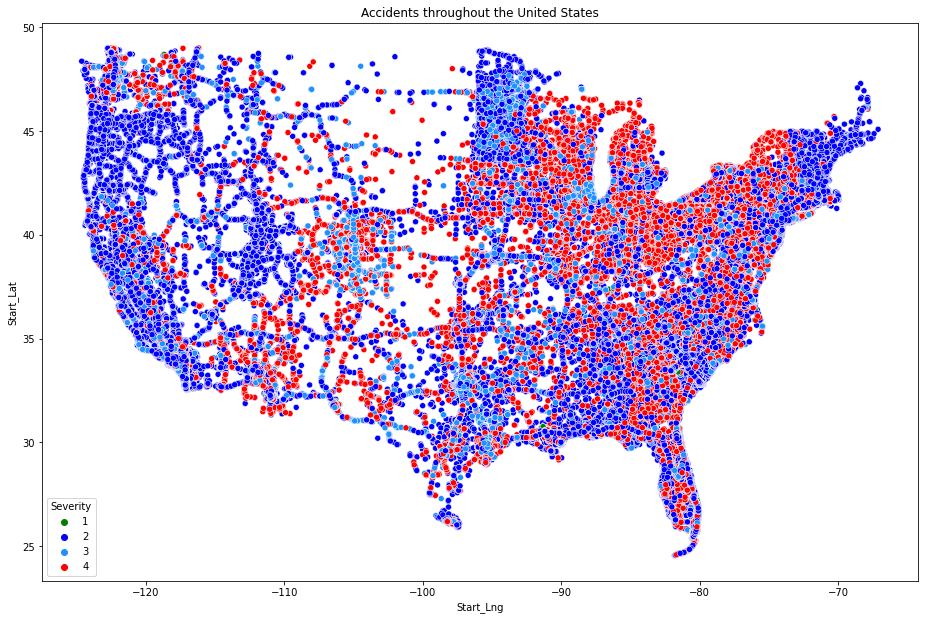

In [ ]:
fig, ax = plt.subplots(figsize=(15.7,10.27))
sns.scatterplot(x = 'Start_Lng',y = 'Start_Lat',data = data2, hue = 'Severity',palette=['green','blue','dodgerblue','red']).set_title('Accidents throughout the United States');

From the plot above we make a few observations. First, we observe that the accidents, and the Level 4 accidents in particular, seem to follow along the paths of the major highways and interstates in the United States. We have inserted a figure below to illustrate this point. This trend is most visible in the west, but this is most likely due to stretches of land with few roads on it. Second, we observe the highest concentration of Level 4 accidents in the most densely populated areas near large cities such as Chicago, Portland, Colombus, and Jacksonville. The Southeast and Midwest regions show particularly high concentrations of severe accidents. None of these observations are particularly suprising. They are trends that we expect to see based on population and density. However, it is good to know that the data aligns with our intuition.

![picture](https://i.redd.it/8gjt1jc0blt01.png)

**Number of Accidents in Each State**

Next, we narrow our analysis to look at accident prevalency per state. Below is a plot of the number of accidents per state.

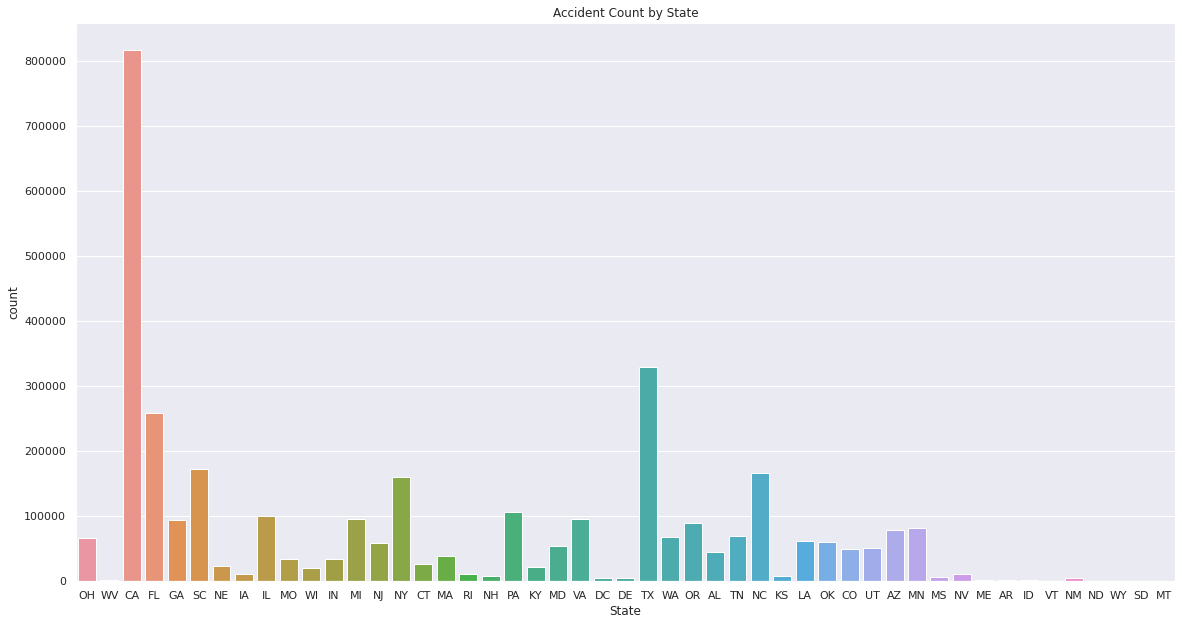

In [ ]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(19.7,10.27))
sns.countplot(x = "State", data = data).set_title('Accident Count by State');

To better view the spread we display the 10 states with the greatest numbers of accidents.

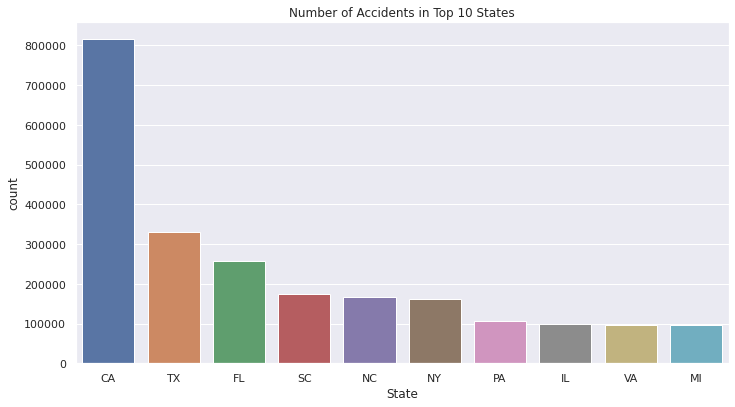

In [ ]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(11.7,6.27))
sns.countplot(x = "State", data = data,order=data.State.value_counts().iloc[:10].index).set_title('Number of Accidents in Top 10 States');

Upon initial observation of the data, it appears that California has recorded a far greater number of accidents, over 800,000 accidents, than the other states. The state with the next greatest number of accidents is Texas which recorded over 300,000. However, upon further inspection we note that the states with the most number of accidents are the most populous states: California, Texas, Florida. Therefore, it is expected that we would see a larger number of accidents in these states than compared to states with smaller populations. In order to account for the varying population sizes, so that we may determine if this trend accidents is due to state policy rather than population, we must standardize our data based on population size.

To achieve this, we must incorporate a second dataset. This dataset, called 'US Census Demographic Data' contains the data from the 2017 US Census. While, this data is two years older than our US Accident dataset, it will provide us with a reasonable approximation for the size of the populations of each state. This dataset reports the data from the census by county. We will perform some data preparation to calculate the total state population for each state. Then, we will standardize our accidents data by calculating the number of accidents per 1000 state residents.

In [ ]:
#calculate total number of accidents in each state and save in dataframe 'dg'
dg = data[['State','ID']].groupby(['State'],as_index=False).agg(['count'])
dg.columns = dg.columns.to_flat_index()
dg.reset_index(inplace=True)
dg.columns = ['_'.join(tup).rstrip('_') for tup in dg.columns.values]
dg = dg.rename(columns = {'S_t_a_t_e':'State'})
dg = dg.rename(columns = {'ID_count':'Total_Accidents'})

#calculate the total population of each state and save in dataframe 'state_pop'
state_pop = population_data[['State','TotalPop']].groupby(['State']).agg(['sum'])
state_pop.columns = state_pop.columns.to_flat_index()
state_pop.reset_index(inplace=True)
state_pop.columns = ['_'.join(tup).rstrip('_') for tup in state_pop.columns.values]
state_pop = state_pop.rename(columns = {'S_t_a_t_e':'State'})
state_pop = state_pop.rename(columns = {'TotalPop_sum':'Total_Pop'})
state_pop['State'] = ['AL','AK','AZ','AR','CA','CO','CT','DE','DC','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','PR','RI','SC','SD','TE','TX','UT','VT','VA','WA','WV','WI','WY']

In [ ]:
#merge total state population and total accidents into a single dataframe
per_thousand_df = pd.merge(dg, state_pop, on = 'State', how = 'outer')
per_thousand_df = per_thousand_df.dropna()
del(dg)
del(state_pop)

#calculate accidents per 1000 residents
per_thousand_df['Accidents_per_1000'] = (per_thousand_df['Total_Accidents']/per_thousand_df['Total_Pop'])*1000
per_thousand_df.head()

,State,Total_Accidents,Total_Pop,Accidents_per_1000
0,AL,44625.0,4850771.0,9.199568
1,AR,2012.0,2977944.0,0.675634
2,AZ,78584.0,6809946.0,11.539592
3,CA,816825.0,38982847.0,20.953447
4,CO,49731.0,5436519.0,9.147581


Now we will examine a plot of the number of accidents per 1000 residents for each state.

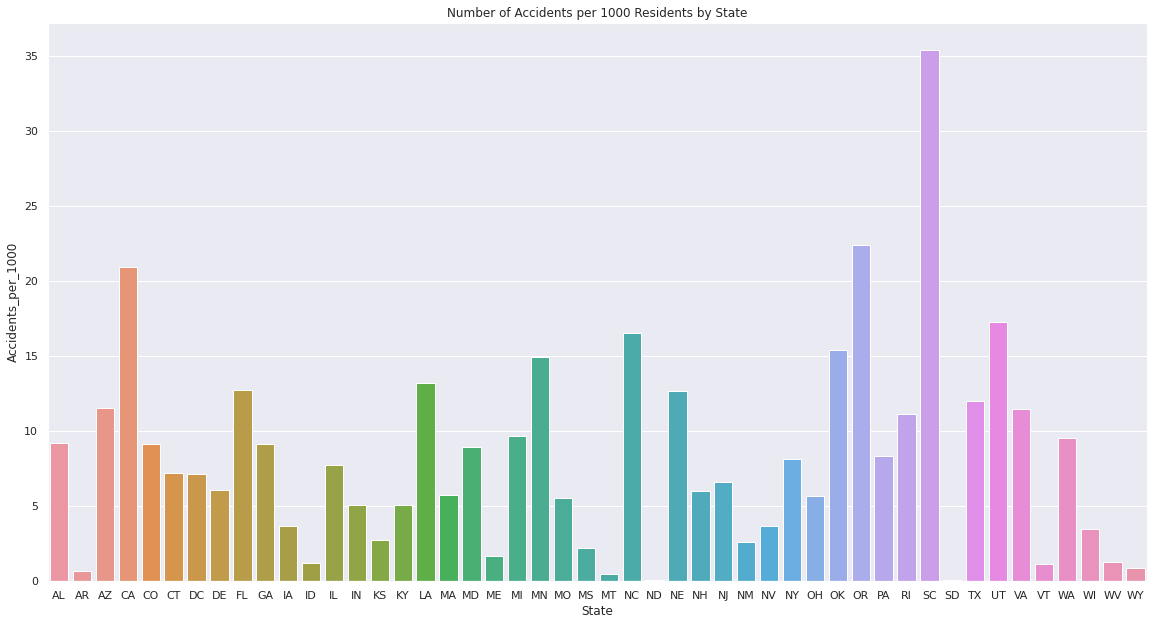

In [ ]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(19.7,10.27))
sns.barplot(x = 'State',y = 'Accidents_per_1000', data = per_thousand_df).set_title('Number of Accidents per 1000 Residents by State');

Right away we notice changes in the distribution. Most noticeably, California is no longer the state with the most prevalent accidents. However, as before, we examine a plot of the top ten states to better view the data.

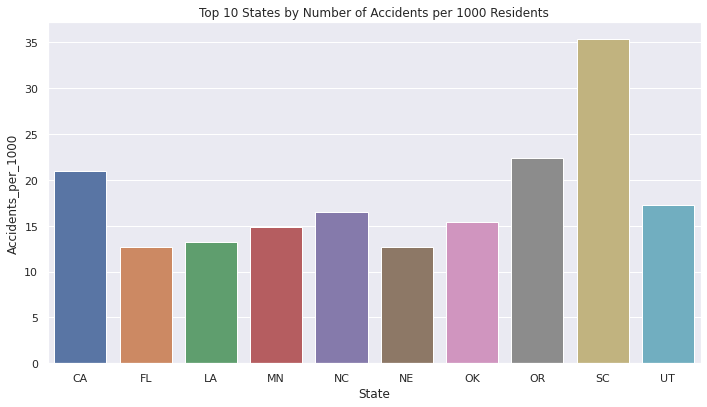

In [ ]:
import seaborn as sns
df = per_thousand_df[per_thousand_df['Accidents_per_1000']>12.1]
fig, ax = plt.subplots(figsize=(11.7,6.27))
sns.barplot(x = "State",y = 'Accidents_per_1000', data = df).set_title('Top 10 States by Number of Accidents per 1000 Residents');

Now that the data has been standardized, there is a clear change in the prevalence of accidents in certain states. South Carolina is by far the states with most accidents per 1000 residents, with over 35 accidents per 1000 residents. The states California, Florida, and North Carlina who were all in the top 10 for total number of accidents remain in the top 10 for number of accidents per 1000 residents, however their rankings change. California drops to third as Oregon and South Carolina both over take it for number of accidents. The remaining of the states in the standardized top 10: Montana, Louisiana, Nebraska, Oklahoma, Oregon, and Utah did not rank in the top 10 states for accidents before the standardization of the data. However, they are shown to have more accidents per 1000 residents than some of the more populous states such as New York or Texas.  

**Number of Accidents in Each County**

In addition to providing data on the population of each county and state, the US 2017 Census data contains information regarding the nature of each county. These attributes such as Drive, Transit, and MeanCommute, can provide insight as to factors that lead to more accidents in a county. In this part we will first add the attribute Total_Accidents to the "population_data" dataframe which holds demographic data.

In [ ]:
pd.set_option('mode.chained_assignment', None)

#create dataframe to count total number of accidents in each county
dg = data[['County','ID','State']].groupby(['County','State'],as_index=False).agg(['count'])
dg.columns = dg.columns.to_flat_index()
dg.reset_index(inplace=True)
dg.columns = ['_'.join(tup).rstrip('_') for tup in dg.columns.values]
dg = dg.rename(columns = {'S_t_a_t_e':'State'})
dg = dg.rename(columns = {'C_o_u_n_t_y':'County'})
dg = dg.rename(columns = {'ID_count':'Total_Accidents'}) 

#rename county column to allow merging with population_data dataframe
for i in range(len(dg)):
    if dg['State'][i] == 'LA':
        dg['County'][i] = dg['County'][i] + ' ' + 'Parish'
    else:
        dg['County'][i] = dg['County'][i] + ' ' + 'County'

#merge with population dataframe
population_data = pd.merge(dg,population_data.drop(columns = ['State']), on = 'County', how = 'outer')
del(dg)
population_data['Accidents_per_1000'] = (population_data['Total_Accidents']/population_data['TotalPop'])*1000
population_data = population_data.dropna()
population_data.head()

,County,State,Total_Accidents,TotalPop,Drive,Transit,MeanCommute,Poverty,Accidents_per_1000
0,Abbeville County,SC,479.0,24788.0,78.3,0.5,25.8,22.7,19.323866
1,Acadia Parish,LA,115.0,62607.0,83.2,0.2,27.6,21.5,1.836855
2,Accomack County,VA,79.0,32840.0,80.0,0.5,22.0,19.8,2.405603
3,Ada County,ID,337.0,435117.0,80.7,0.5,20.4,11.8,0.774504
4,Adair County,IA,112.0,7192.0,77.9,0.3,22.3,9.5,15.572859


Now we will use scatterplots to explore relationships between the number of accidents and county characteristics. For each of the scatterplots we will compare county characteristics to the Number of Accidents per 1000 County Residents. We remove the outliers of the Number of Accidents per 1000 distribution by filtering for counties with less than 5000 (and occasionally 3500) Accidents per 1000 people.

Percent Drive

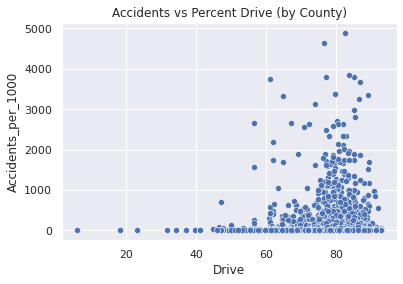

In [ ]:
sns.scatterplot(x = 'Drive', y = 'Accidents_per_1000',data = population_data[population_data['Accidents_per_1000']<5000]).set_title('Accidents vs Percent Drive (by County)');

Unsurprisingly, from this plot we observe that as the percentage of the county population that commutes to work via driving increases, the number of accidents per 1000 residents increases as well. While there are many counties that also have low rates of accidents along with higher rates of drivers, the reverse is rare.

Mean Commute (min)

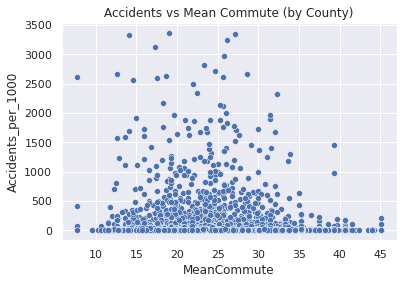

In [ ]:
sns.scatterplot(x = 'MeanCommute', y = 'Accidents_per_1000',data = population_data[population_data['Accidents_per_1000']<3500]).set_title('Accidents vs Mean Commute (by County)');

Again, the relationship is not very strong between the two variables, however we note somehwat interestingly that the counties with the highest accident rates have average mean commute times. Counties with low mean commute times and high mean commute times tend to have lower accident rates.

Percent Public Transit

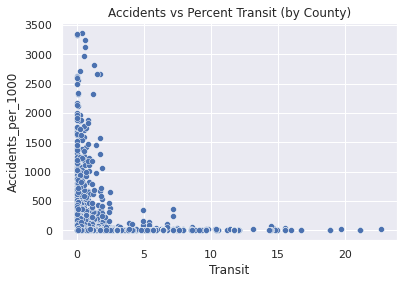

In [ ]:
sns.scatterplot(x = 'Transit', y = 'Accidents_per_1000',data = population_data[(population_data['Accidents_per_1000']<3500) & (population_data['Transit']<25)]).set_title('Accidents vs Percent Transit (by County)');

As one would imagine, as the percentage of the population that commutes via public transit increases, the number of accidents decreases. This change is rather abrupt and somewhat surprisingly happens at a less than 5% Public Transit Rate. While there are counties with very low rates of Public Transit that also maintain low rates of accidents, the reverse does not occur nearly as often. 

Poverty Rate

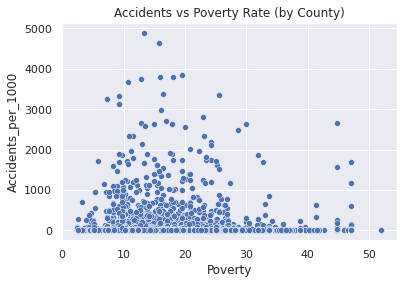

In [ ]:
sns.scatterplot(x = 'Poverty', y = 'Accidents_per_1000',data = population_data[population_data['Accidents_per_1000']<5000]).set_title('Accidents vs Poverty Rate (by County)');

The relationship between accident rates and poverty rates is not strong. There appears to be a weak trend in which counties with very low or very high poverty rates have lower accident rates. There seems to be a relatively higher accident rate around countines with around 10-20% poverty rates but it is not higher by enough to make a solid conclusion.

**Distribution of Time of Accidents**

Next, we will explore the relationship between accident prevalence and the time at which they occur.

Day of the Week

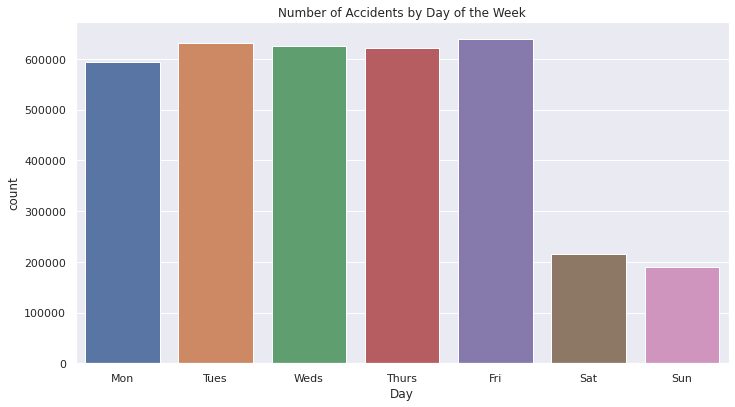

In [ ]:
fig, ax = plt.subplots(figsize=(11.7,6.27))
data2['Day'] = data2['Day'].replace(0, 'Mon').replace(1,'Tues').replace(2,'Weds').replace(3,'Thurs').replace(4,'Fri').replace(5,'Sat').replace(6,'Sun')
sns.countplot(x = 'Day', data = data2).set_title('Number of Accidents by Day of the Week');

From the plot above, we note that the number of accidents is fairly consistent Monday-Friday, however, the number of accidents drops significantly, to about a third of the original number, on the weekends. We hypothesize that this could be due to the work commute which happens Monday-Friday, but not on Saturday or Sunday.   

In the following plot, we break this distribution down further to investigate accident severity.

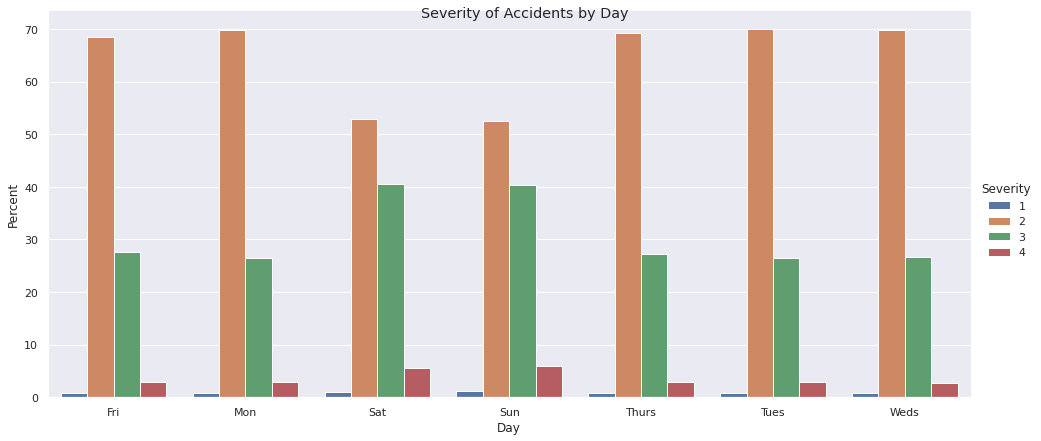

In [ ]:
sns.set()
df = data2
x,y = 'Day', 'Severity'

g = (df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Percent',hue=y,kind='bar', height = 6, aspect = 2.25));
g.fig.suptitle('Severity of Accidents by Day');


What is interesting is that while there are fewer accidents occuring on the weekends, the severity of the accidents increases. During the weekdays, the percentage of accidents classified as Level 4 is constant at under 5% of the total number of accidents. However, on Saturday and Sunday, this percentage nearly doubles. 

Time of Day

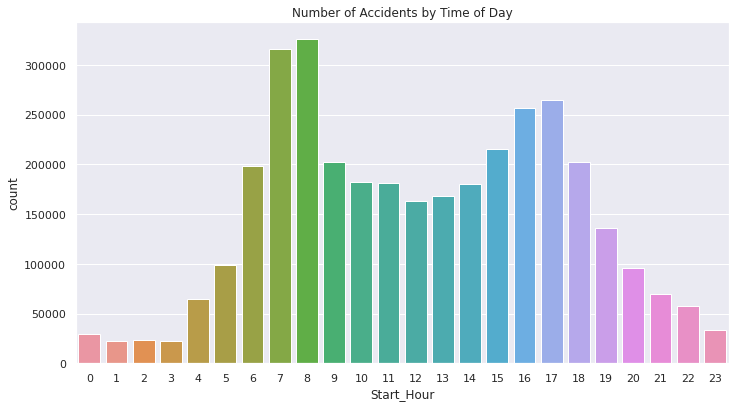

In [ ]:
fig, ax = plt.subplots(figsize=(11.7,6.27))
sns.countplot(x = 'Start_Hour', data = data2).set_title('Number of Accidents by Time of Day');

We observe from this distribution that accidents occur most frequently during the hours of 6:00-9:00am in the morning and 3:00-6:00pm in the evening. As with day of the week, this is most likely due to the work commute. Those hours of the day are the hours during which people are commuting to and from school and work. Therefore we would expect to see an increase in cars on the road leading to more accidents. This observation indicates that measures in place to reduce accidents should be heightened during these commuting hours.

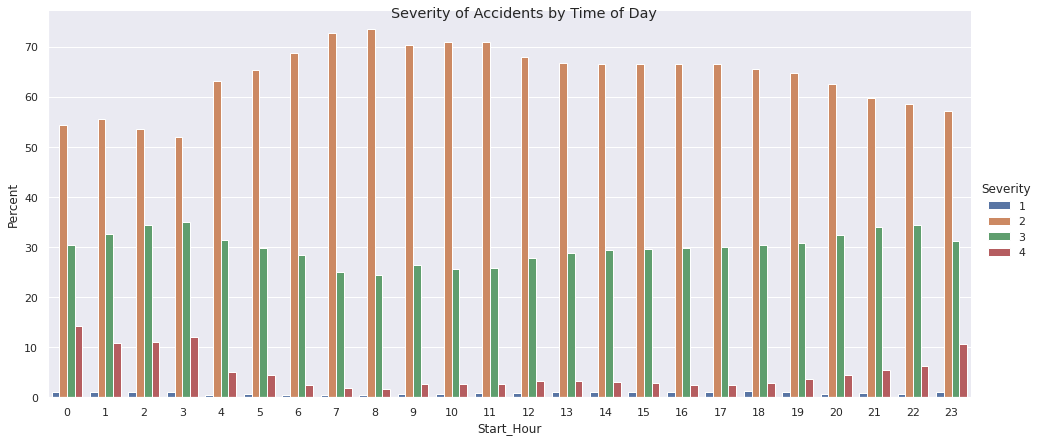

In [ ]:
sns.set()
df = data2
x,y = 'Start_Hour', 'Severity'

g = (df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Percent',hue=y,kind='bar', height = 6, aspect = 2.25));
g.fig.suptitle('Severity of Accidents by Time of Day');

From this plot we make two observations, the first is that the percentage of accidents occurring at each hour of the day that are classified as Severity Level 1 or 2 remain fairly constant at all hours. Level 2 accidents are by far the most common, hovering around 50%-70% of all accidents for all hours of the day. Similarly, Level 1 accidents are the least common making up less than 5% of the accidents at any given hour. Level three accidents also remain relatively constant throughout the day, though they do experience a slight increase around the hours of 0:00-6:00 in the morning and 20:00-23:00 at night. The most significant trend that we note from this plot is regarding Severity Level 4 accidents, the most severe. These accidents show a signiciant increase in frequency between the hours of 0:00-3:00 in the morning and also show an increase 21:00-23:00 at night. During the hours of 0:00-3:00 and 23:00, the frequency of Level 4 accidents doubles, acccounting for over 10% of the total number of accidents, compared to under 5% for the rest of the day. We hypothesize that this difference could be due to driving conditions, specifically the lack of light during those hours of the day, as the sun has completely set. This could also be due to human conditions such as fatigue, or intoxication, which we hypothesize may be more prevalent during those late hours.

To test this hypothesis, we now examine a plot of the number of accidents vs day/night.

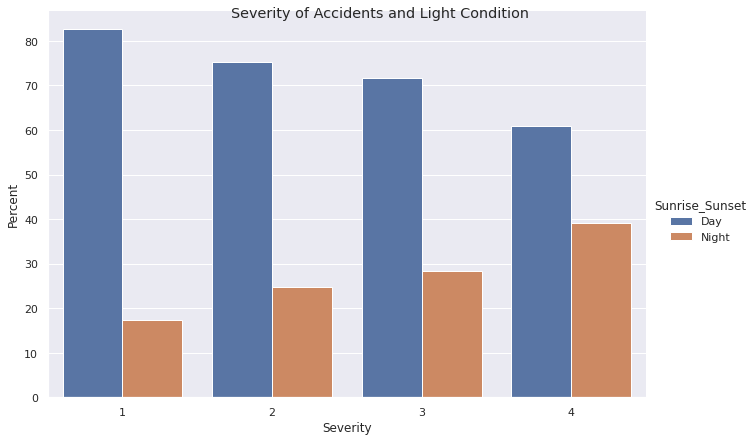

In [ ]:
sns.set()
df = data2
x,y = 'Severity', 'Sunrise_Sunset'

g = (df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Percent',hue=y,kind='bar', height = 6, aspect = 1.5));
g.fig.suptitle('Severity of Accidents and Light Condition');

As further confirmation of this hypothesis, we note that as the severity of the motor vehicle accident increases, the percentage of accidents that occur after sunset increases from less than 20% (Severity Level 1) to nearly 40% (Severity Level 4).

**Distribution of Accident Severity**

The goal of our analysis is to investigate factors that lead to accidents as well as factors that lead to more severe accidents. With this in mind, we will view the distribution of accident severity among the instances of this dataset.

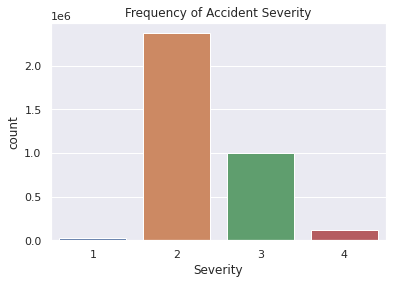

In [ ]:
sns.set_theme()
sns.countplot(x = "Severity", data = data).set_title('Frequency of Accident Severity');

We observe that the distribution is extremeley skewed. There is an overwhelming number of accidents classified as Severity Level 2 and very few accidents classified as Severity Level 4 or Severity Level 1. From this we understand that most accidents recorded are relatively mild and do not have a significant impact on traffic. The fewest number of accidents are classified as Severity Level 1, the lowest level, perhaps due to the fact that extremely mild accidents may not be reported at all.  

Aside from indicating the trend in accident severity, this distrubtion is important to understand because it may pose a problem in future analysis, specifically regression analysis, and we will need to work around it.

Finally, we explore the distribution of Distance(mi) and Duration (min) which we hypothesize to be strongly correlated to accident severity. If so, these variables could be useful substitutes for severity when analyzing factors that contribute to accidents and accident severity. In both of the following plots we have removed outliers at the high end of the distributions.

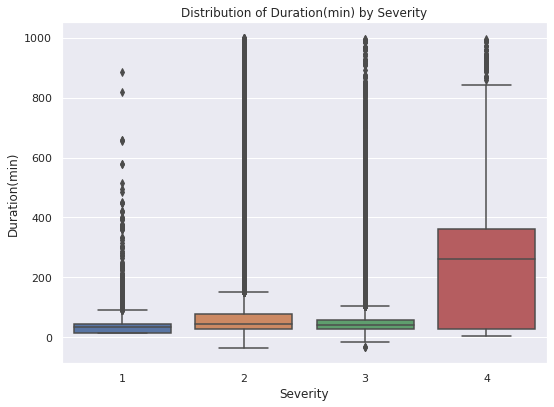

In [ ]:
df = data2[data2['Duration(min)'] < 1000]
fig, ax = plt.subplots(figsize=(8.7,6.27))
sns.boxplot(x = 'Severity',y = 'Duration(min)', data = df).set_title('Distribution of Duration(min) by Severity');
del(df)

At first glance, there does not appear to be a significant difference in duration of the accidents for a severity level of 1, 2, and 3. The level 4 severity accidents have longer durations. There does not appear to be a strong linear correlation between duration and severity, however the most severe accidents tend to have longer durations. 

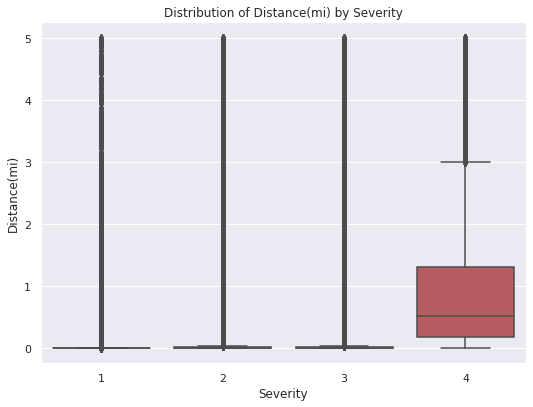

In [ ]:
df = data2[data2['Distance(mi)'] < 5]
fig, ax = plt.subplots(figsize=(8.7,6.27))
sns.boxplot(x = 'Severity',y = 'Distance(mi)', data = df).set_title('Distribution of Distance(mi) by Severity');
del(df)

There is a similar trend in the relationship between distance and severity. There seems to be no change in the average distance for accidents of level 1, 2, and 3 severity, however level 4 accidents affect a larger stretch of the road. \
 
 Neither duration nor distance has a linear relationship to severity. When evaluating the factors that effect the impact of an accident, the attributes duration and distance may not be perfect substitutes for severity. However, they are worth exploration as they are indicative of the impact of each accident on other consequences such as traffic disruption and the area affected and long durations and distances can signal in some cases the most severe accidents.

**Summary:**  

In this section we have explored some of the general trends in accident prevalance across the United States. We looked at the relationship between the rate of accidents and location and time of day. Based on our analysis, we take away three main ideas. First accidents are more prevalent on weekdays during the commuting hours in the morning and evening. However, accidents tend to be more severe on the weekends and during the middle of the night. In both cases, lack of natural light is a significant factor. Second, while the most populous states such as California and Texas record the greatest number of accidents, the top two states for accidents per 1000 residents are South Carolina and Oregon. Finally, communities with larger populations of residents commuting via car typically have higher accident rates, while communities with public transit record much lower accident rates. IOne exception to this last point is that in the counties at the extremes of commuter percentages, accident rates actually decrease with both. This could have something to do with improved infrastructure in areas with the highest percentages of commuting residents.

We will keep these insights in mind as we continue our analysis as they can help inform our final recommendations.

### Exploration of Weather Conditions

In this part, we will explore the relationship between weather conditions and accident rates to understand any significant factors in causing accidents or impacting accident severity. We start by reminding ourselves of the attributes we will be working with.

In [ ]:
data_weather.head()

,ID,Severity,Distance(mi),County,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Sunrise_Sunset,Duration(min)
0,A-1,3,0.01,Montgomery,OH,36.9,91.0,29.68,10.0,NaN,0.02,Night,314.0
1,A-2,2,0.01,Franklin,OH,37.9,100.0,29.65,10.0,NaN,0.00,Night,30.0
2,A-3,2,0.01,Clermont,OH,36.0,100.0,29.67,10.0,3.5,NaN,Night,30.0
3,A-4,3,0.01,Montgomery,OH,35.1,96.0,29.64,9.0,4.6,NaN,Night,30.0
4,A-5,2,0.01,Montgomery,OH,36.0,89.0,29.65,6.0,3.5,NaN,Day,30.0


We start be viewing the distributions of each of the continuous attributes.

In [ ]:
import numpy as np

data_weather.agg({'Temperature(F)':[np.mean, np.median, np.max],
                  'Humidity(%)':[np.mean, np.median, np.max],
                  'Pressure(in)':[np.mean, np.median, np.max],
                  'Visibility(mi)':[np.mean, np.median, np.max],
                  'Wind_Speed(mph)':[np.mean, np.median, np.max],
                  'Precipitation(in)':[np.mean, np.median, np.max]})

,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
mean,61.935119,65.11427,29.744629,9.122644,8.219025,0.015983
median,64.000000,67.00000,29.950000,10.000000,7.000000,0.000000
amax,170.600000,100.00000,57.740000,140.000000,984.000000,25.000000


We note that there is a large range in values for all of the attributes. Furthermore there appear to be some outliers on the high end of the distributions. What is most unsettling however, are some issues with the distributions that do not make sense. The max values of several of these attributes are not realistically possible, specifically in the wind speed and temperature attributes. We infer that these entries are due to errors when recording the data and will filter out these values later during our analysis.

**Temperature**

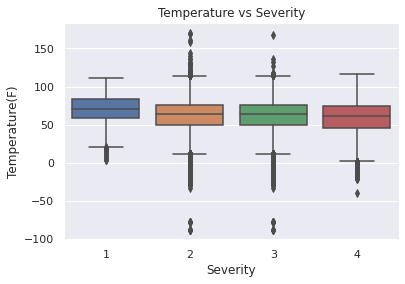

In [ ]:
sns.set()
sns.boxplot(x = 'Severity',y = 'Temperature(F)', data = data_weather).set_title("Temperature vs Severity");

There appears to be a slight decrease in mean temperature as severity increases. This would align with our assumption that conditions such as snow and ice lead to more severe accidents. However, there are also more very cold instances at levels 2 and 3 severity. In general the relationship between Temperature and Accident Severity is weaker than we expected.

**Pressure**

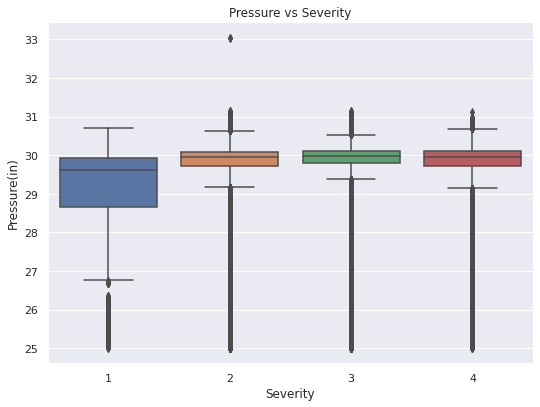

In [ ]:
sns.set()
fig, ax = plt.subplots(figsize=(8.7,6.27))
sns.boxplot(x = 'Severity',y = 'Pressure(in)', data = data_weather[(data_weather['Pressure(in)']<35)&(data_weather['Pressure(in)']>25)]).set_title("Pressure vs Severity");

There is a slightly lower average pressure for Level 1 Severity accidents, and more distribution of medium pressure at this level. The distribution of pressure for the Level 2, 3, and 4 Severity accidents are very similar. There does not appear to be a strong correlation between pressure and severity. 

**Humidity**

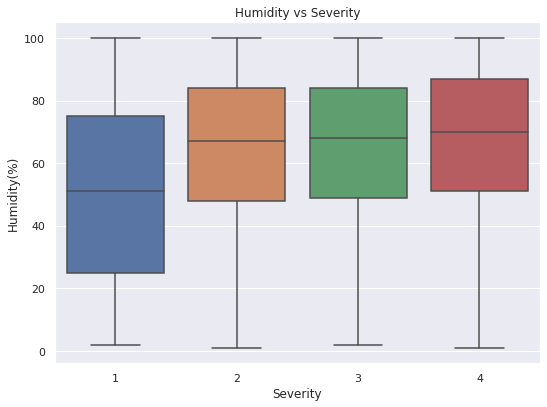

In [ ]:
sns.set()
fig, ax = plt.subplots(figsize=(8.7,6.27))
sns.boxplot(x = 'Severity',y = 'Humidity(%)', data = data_weather).set_title("Humidity vs Severity");

A very similar trend is seen with humidity. There is little change in humidity between Level 2, 3, and 4 Severity, though Level 1 accidents have low humidity more often. Overall there is a wider distribution of humidity than the other variables examined. 

**Precipitation**

When examining the relationship between Precipitation and Severity, we must account for the extremely skewed distribution of Precipiation. The majority of instances have Precipiation values under 1 inch. To better view the distribution we will filter by instances with Precipitation < 5in and Precipiation < 0.5in.

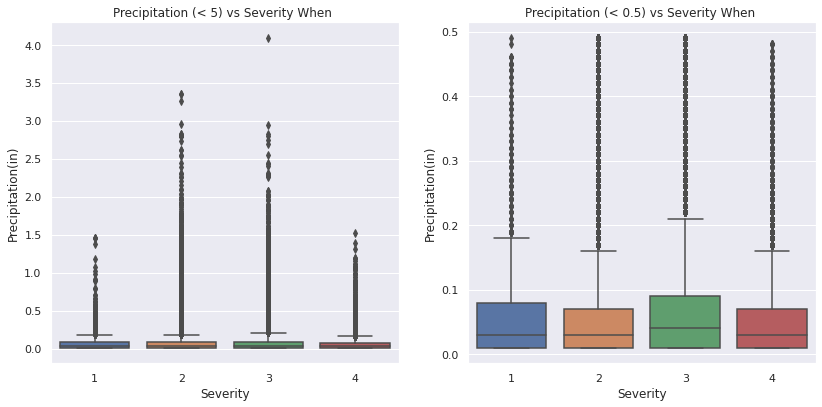

In [ ]:
sns.set()
fig, ax = plt.subplots(figsize=(13.7,6.27))
plt.subplot(1,2,1)
sns.boxplot(x = 'Severity',y = 'Precipitation(in)', data = data_weather[(data_weather['Precipitation(in)']>0)&(data_weather['Precipitation(in)']<5)]).set_title("Precipitation (< 5) vs Severity When ");
plt.subplot(1,2,2)
sns.boxplot(x = 'Severity',y = 'Precipitation(in)', data = data_weather[(data_weather['Precipitation(in)']>0)&(data_weather['Precipitation(in)']<.5)]).set_title("Precipitation (< 0.5) vs Severity When ");

There does not appear to be a relationship here. However, we expect some influence on severity, so we will look at precipitation data more closely by focusing on instances with high levels of precipitation, even though there are fewer of these instances.

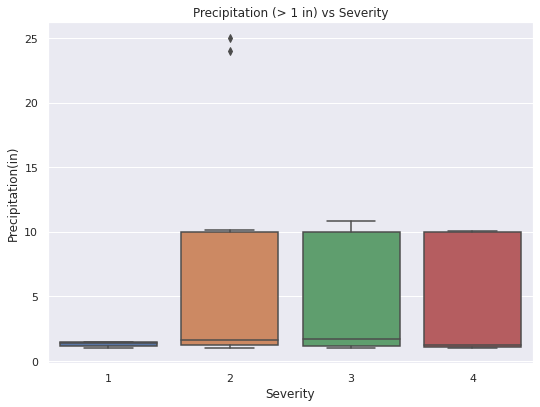

In [ ]:
sns.set()
fig, ax = plt.subplots(figsize=(8.7,6.27))
sns.boxplot(x = 'Severity',y = 'Precipitation(in)', data = data_weather[(data_weather['Precipitation(in)']>1)]).set_title("Precipitation (> 1 in) vs Severity");

There are only a few instances of high precipitation. We chose to look at these specifically because we would expect more severe accidents to occur with unusually high precipitation events. There is still not a clear relationship, however it is highly likely for precipitation outliers to be greater than 2 in terms of severity. \

Overall, it appears that preciptation has little impact on accident severity until it is an abnormal weather event. This is reasonable as a small amount of rain likely does not have a large impact on drivers. However in more intense rain visibility can be decreased and roads can be flooded, causing more commplications when accidents occur. 

**Wind Speed**

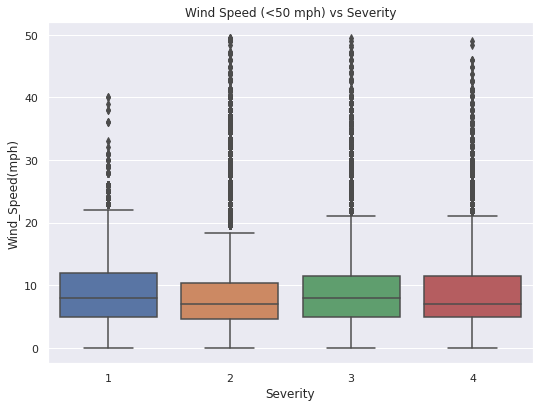

In [ ]:
sns.set()
fig, ax = plt.subplots(figsize=(8.7,6.27))
sns.boxplot(x = 'Severity',y = 'Wind_Speed(mph)', data = data_weather[data_weather['Wind_Speed(mph)']<50]).set_title('Wind Speed (<50 mph) vs Severity');

At extremely high wind speeds, the severity of the accidents tend to be higher. However, in the plot above after we have filtered to remove the greatest outliers, we observe no pattern and wind speed seems to have no correlation to severity. The changes in average wind speed for each level of severity are likely due to natural variation.

**Visibility**

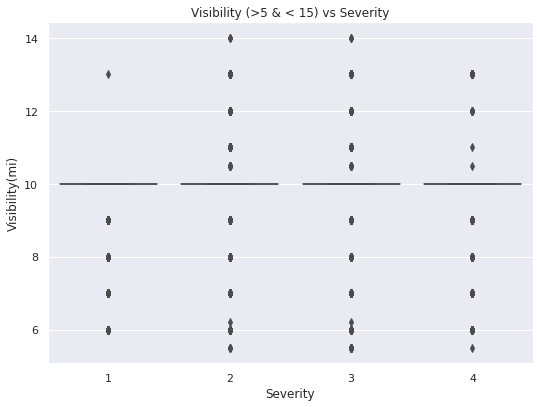

In [ ]:
sns.set()
fig, ax = plt.subplots(figsize=(8.7,6.27))
sns.boxplot(x = 'Severity',y = 'Visibility(mi)', data = data_weather[(data_weather['Visibility(mi)']>5)&(data_weather['Visibility(mi)']<15)]).set_title('Visibility (>5 & < 15) vs Severity');

The distribution of Visibility is so concentrated around 10 miles that even after attempting to filter the outliers of instances with Visbility <5 or > 15, we are still unable to view any distribution at all in the data. We will not yet rule our visibility completely, however we no longer believe it to be a strong indicator of accident severity.

Now we examine some plots of the relationship between two or more weather condition attributes. We focus in particular on attributes that we believe could have an impact on severity when examined in combination. 

**Temperature and Precipitation**

The distribution of Precipitation is concentrated around values under 3in and values around 10in. We examine each of these centers in two separate plots to allow for better visualization.

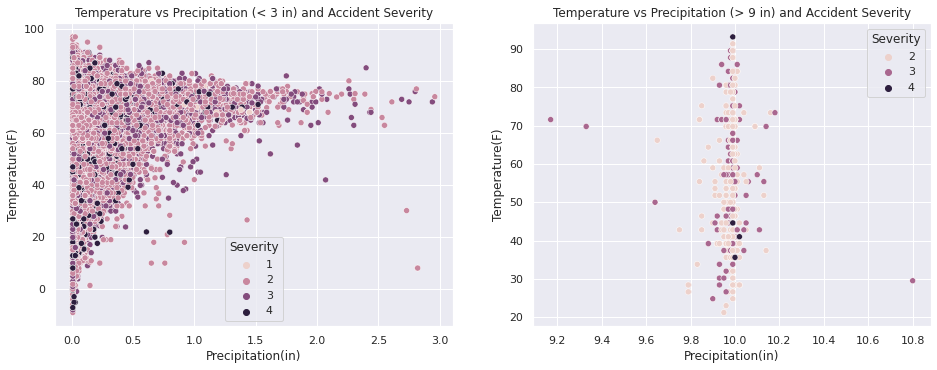

In [ ]:
sns.set()
fig, ax = plt.subplots(figsize=(15.7,12.27))

plt.subplot(2,2,2)
sns.scatterplot(x = 'Precipitation(in)',y = 'Temperature(F)',hue = 'Severity', data = data_weather[(data_weather['Precipitation(in)']>8) & (data_weather['Precipitation(in)']<20)]).set_title('Temperature vs Precipitation (> 9 in) and Accident Severity');

plt.subplot(2,2,1)
sns.scatterplot(x = 'Precipitation(in)',y = 'Temperature(F)',hue = 'Severity', data = data_weather[(data_weather['Precipitation(in)']>0) & (data_weather['Precipitation(in)']<3)]).set_title('Temperature vs Precipitation (< 3 in) and Accident Severity');

There appears to be a nonlinear correlation between precipitation and temperature. Instances of high precipitation often have higher temperatures, likely due to more humidity and evaporation, causing more water to be stored in the atmosphere and therefore causing more rain. The few outliers with high precipitation and low temperature are representative of unusually high amounts of snow. \

While there is not a clear pattern in the distribution of severity in this graph, there does appear to be a cluster of level 4 severity accidents occuring when there is some precipitation and low temperatures. This is likely due to snow or ice making roads slippery and more dangerous. \

The second graph, displaying instances of higher precipitation is clustered around 10 inches. This is an odd concentration of accidents, and could possibly be due to rounding or human error when recording data. The majority of the accidents occuring at any temperature with precipitation of about 10 in is level 2 severity, which is also unexpected as this is a large amount of precipitation. 

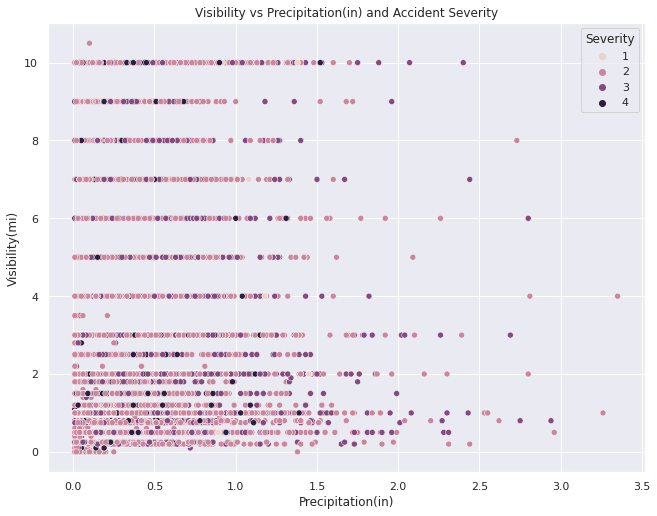

In [ ]:
sns.set()
fig, ax = plt.subplots(figsize=(10.7,8.27))
sns.scatterplot(x = 'Precipitation(in)',y = 'Visibility(mi)', hue = 'Severity', data = data_weather[(data_weather['Precipitation(in)']<4) & (data_weather['Precipitation(in)']>0) & (data_weather['Visibility(mi)']<20)]).set_title('Visibility vs Precipitation(in) and Accident Severity');

**Wind Speed and Precipitation**

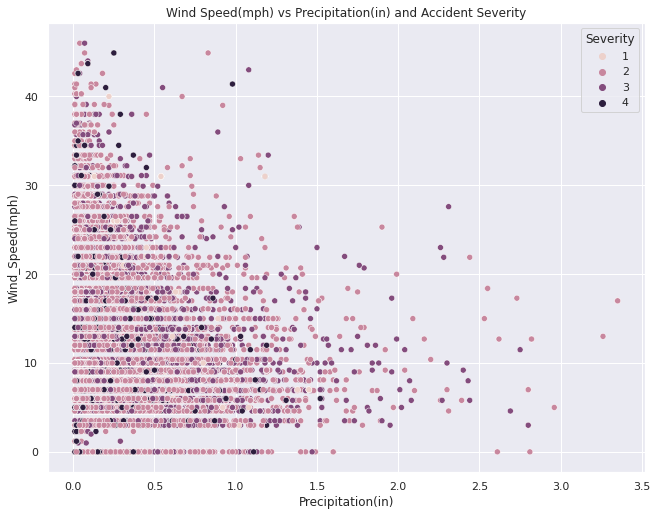

In [ ]:
sns.set()
fig, ax = plt.subplots(figsize=(10.7,8.27))
sns.scatterplot(x = 'Precipitation(in)',y = 'Wind_Speed(mph)', hue = 'Severity', data = data_weather[(data_weather['Precipitation(in)']<4) & (data_weather['Precipitation(in)']>0) & (data_weather['Wind_Speed(mph)']<50)]).set_title('Wind Speed(mph) vs Precipitation(in) and Accident Severity');

There appears to be a weak negative correlation between wind speed and precipitation. Incidents of low precipitation and low wind speed are very common while it is rare to have a relatively high wind speed and preciptation together. There is no clear pattern to discern from the distribution of severity in this graph. 

**Summary:** \

Multiple attribute describing the weather conditions at the time of each accident were explored. There is no strong conclusion to draw from this exploration, though there are indications that further investigation may be fruitful. There is the possibility of a weak slightly negative correlation between temperature and severity. Pressure and humidity are often lower in accidents with level 1 severity, though there is no clear correlation when accidents are more severe. Further investigation is neccesary to understand this relationship especially since this difference may be due to an underprepresentation of accidents with level 1 severity. There is no clear relationship between wind speed and severity. We will no longer consider Wind Speed in our analysis, as we did not observe any relationship to Severity. When precipitation was examined without outliers, there was no clear correlation to be seen. However, when looking at instances of unusually high precipitation, there is more to be explored. It is very uncommon for there to be high precipitation levels in level 1 severity accidents, and equally common in the level 2, 3, and 4 severity level accidents.

In [ ]:
data_weather = data_weather.drop(columns = ['Wind_Speed(mph)'])

### Exploration of Road Conditions

In this part, we will explore the relationship between road conditions and accident rates to understand any significant factors in causing accidents or impacting accident severity. We start by reminding ourselves of the attributes we will be working with. 

In [ ]:
data_road.head()

,ID,Severity,Distance(mi),County,State,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Duration(min)
0,A-1,3,0.01,Montgomery,OH,False,False,False,False,False,False,False,False,False,False,False,False,False,314.0
1,A-2,2,0.01,Franklin,OH,False,False,False,False,False,False,False,False,False,False,False,False,False,30.0
2,A-3,2,0.01,Clermont,OH,False,False,False,False,False,False,False,False,False,False,False,True,False,30.0
3,A-4,3,0.01,Montgomery,OH,False,False,False,False,False,False,False,False,False,False,False,False,False,30.0
4,A-5,2,0.01,Montgomery,OH,False,False,False,False,False,False,False,False,False,False,False,True,False,30.0


**Narrowing the Analysis**

In order to narrow our analysis we will examine the percentage of each of the attributes that are True. This will allow us to eliminate attributes that do not provide enough information. We will also examine a correlation heatmap to evaluate which attributes are correlated and specifically, which attributes are highest correlated with accident Severity.

In [ ]:
print('Percent True Amenity:' + str(Counter(data_road['Amenity'])[1]/len(data_road)*100))
print('Percent True Bump:' + str(Counter(data_road['Bump'])[1]/len(data_road)*100))
print('Percent True Crossing:' + str(Counter(data_road['Crossing'])[1]/len(data_road)*100))
print('Percent True Give_Way:' + str(Counter(data_road['Give_Way'])[1]/len(data_road)*100))
print('Percent True Junction:' + str(Counter(data_road['Junction'])[1]/len(data_road)*100))
print('Percent True No_Exit:' + str(Counter(data_road['No_Exit'])[1]/len(data_road)*100))
print('Percent True Railway:' + str(Counter(data_road['Railway'])[1]/len(data_road)*100))
print('Percent True Roundabout:' + str(Counter(data_road['Roundabout'])[1]/len(data_road)*100))
print('Percent True Station:' + str(Counter(data_road['Station'])[1]/len(data_road)*100))
print('Percent True Stop:' + str(Counter(data_road['Stop'])[1]/len(data_road)*100))
print('Percent True Traffic_Calming:' + str(Counter(data_road['Traffic_Calming'])[1]/len(data_road)*100))
print('Percent True Traffic_Signal:' + str(Counter(data_road['Traffic_Signal'])[1]/len(data_road)*100))
print('Percent True Turning_Loop:' + str(Counter(data_road['Turning_Loop'])[1]/len(data_road)*100))

Percent True Amenity:1.1976831851621847
Percent True Bump:0.017247184311779
Percent True Crossing:7.813202178837364
Percent True Give_Way:0.2721981365641161
Percent True Junction:8.095617706767698
Percent True No_Exit:0.12477170960864545
Percent True Railway:0.8872623282503471
Percent True Roundabout:0.005236768833939498
Percent True Station:2.0013848976709756
Percent True Stop:1.4792733527871704
Percent True Traffic_Calming:0.03987344095841977
Percent True Traffic_Signal:17.74874723112963
Percent True Turning_Loop:0.0


Right away we notice that there are no accidents recorded where a Turning Loop was present. Similarly, there are very few accidents where a Roundabout was present, and also few accidents were a Bump or Traffic Calming measure was present. This may indicate that these measures are effective at decreasing the risk of an accident. However, as we continue our analysis, these attributes no longer provide enough information to be effectively analyzed as they are relatively homogeneous. Therefore they will be removed from our analysis.

In [ ]:
data_road = data_road.drop(columns = ['Bump','Traffic_Calming','Turning_Loop','Roundabout'])

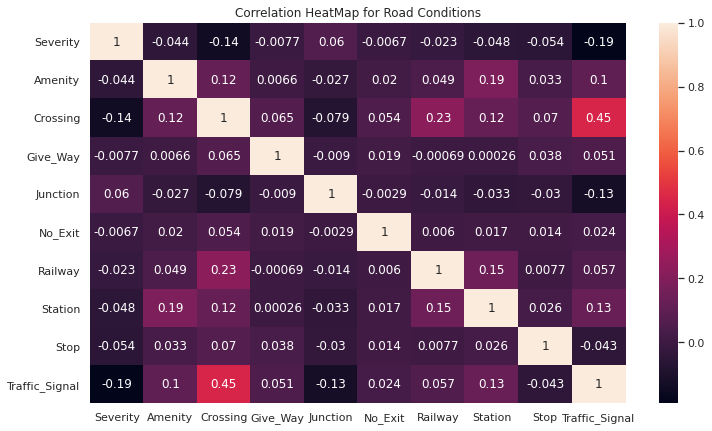

In [ ]:
#get correlations of each features in dataset
corrmat = data_road.drop(columns = ['State','County','Distance(mi)','Duration(min)','ID']).corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,7))
#plot heat map
g=sns.heatmap(data_road[top_corr_features].corr(),annot=True).set_title('Correlation HeatMap for Road Conditions');

From this heat map certain relationships standout. First we note that Traffic Signals and Crossings have a positive relationship of fair strength. Similarly, Railways and Crossings have a slightly stronger positive correlation (though still weak) as do Station and Amenity. These relationships are expected since these road features are often found together.  

We are most interested in the relationships between Severity and different attributes. All attributes have a fairly weak relationship to accident Severity, however the attributes with the strongest relationship are: Traffic Signal and Crossing which are negatively correlated as well as Stop which is also negatively correlated. The only attribute to display a positive correlation is Junction. The attributes No Exit, Give Way, and Railway have extremely weak correlations with Severity. Therefore, we will remove these attributes from further analysis.  

In [ ]:
data_road = data_road.drop(columns = ['No_Exit','Give_Way','Railway'])

**Feature Exploration**

Now that we have narrowed our attributes to analyze, we will begin by investigating the relationship between accident severity and the remaining road conditions by plotting the percentage of accidents in each Severity class for which the road condition was present or not. We will be looking for trends in Severity increasing or decreasing based on the presence of the road conditions.  

Traffic Signal

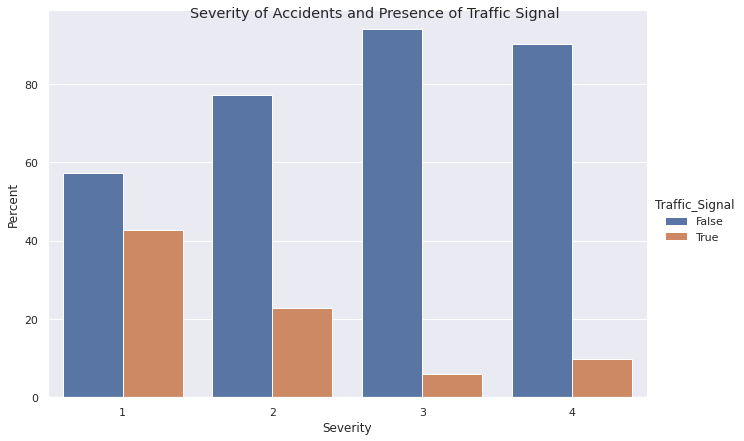

In [ ]:
sns.set()

df = data2
x,y = 'Severity', 'Traffic_Signal'

g = (df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Percent',hue=y,kind='bar', height = 6, aspect = 1.5));
g.fig.suptitle('Severity of Accidents and Presence of Traffic Signal');

The plot above displays the percentage of accidents in each of the four Severity classes at the site of which a Traffic Signal was/was not present. We observe a fairly strong trend in the data indicating that as the severity of accidents increases, the likelihood of a Traffic Signal being present decreases. This indicates that the presence of a Traffic Signal decreases the risk of severe accidents and may decrease the risk of accidents in general. This observation aligns with our previous measurement of a correlation of -.19 between Traffic Signal and Severity.

Junction

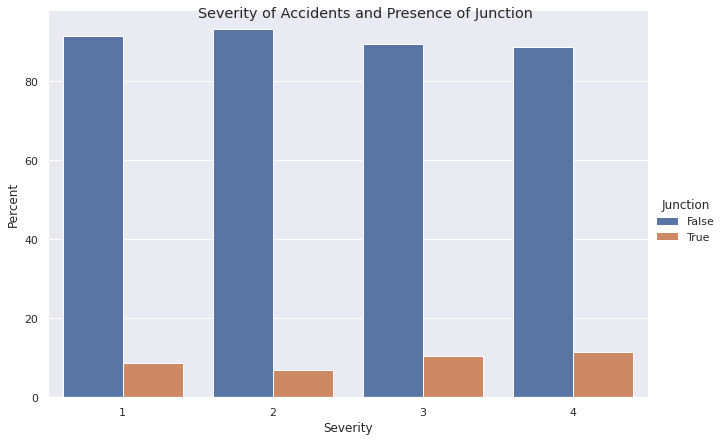

In [ ]:
sns.set()
df = data2
x,y = 'Severity', 'Junction'

g = (df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Percent',hue=y,kind='bar', height = 6, aspect = 1.5));
g.fig.suptitle('Severity of Accidents and Presence of Junction');

When examining the plot above to determine the impact of the presence of a Junction, we do not observe a strong trend in the data. There appears to be a slight increase in the presence of a Junction as the severity of accidents increases. We infer that Junctions may then be a contributing factor to the cause of accidents and accident severity. However, the trend is not clear. To better observe this trend, we will compare the distribution of accident severity between accidents where a Junction was present and accidents where a Junction was not present.

In [ ]:
#create dataframes for where a Junction was present and was not present
data_junction = data_road[data_road['Junction']==True]
data_junction2 = data_road[data_road['Junction']==False]

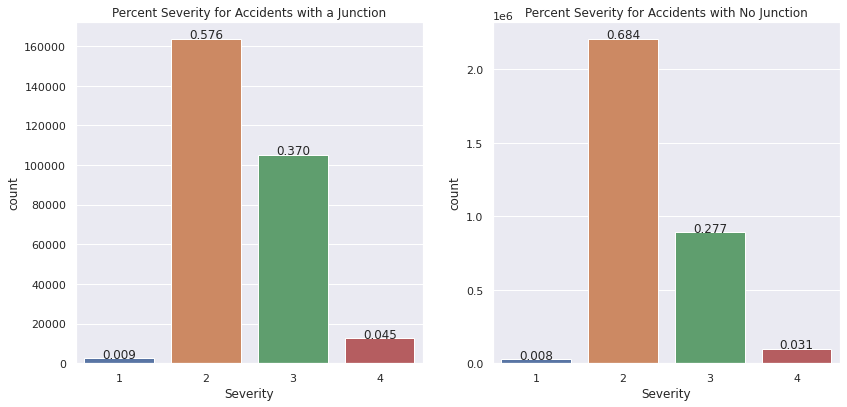

In [ ]:
#plot side by side plots of distribution of severity for distributions of accidents where junctions were present/not present
fig, ax = plt.subplots(figsize=(13.7,6.27))

plt.subplot(1, 2, 1)
total = float(len(data_junction))
dg = sns.countplot(x="Severity", data=data_junction);
for p in dg.patches:
    height = p.get_height()
    dg.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}'.format(height/total),
            ha="center")
dg.set_title('Percent Severity for Accidents with a Junction');

plt.subplot(1, 2, 2)
total2 = float(len(data_junction2))
dg2 = sns.countplot(x="Severity", data=data_junction2);
for p in dg2.patches:
    height = p.get_height()
    dg2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}'.format(height/total2),
            ha="center")
dg2.set_title('Percent Severity for Accidents with No Junction');

#delete created dataframes to save space
del(data_junction)
del(data_junction2)

From these plots, we observe that our inference is supported. The distribution of accidents where a Junction was present shows higher percentages of more severe accidents. There is a 1% increase Level 4 accidents and a 10% increase in Level 3 accidents. This indicates that the presence of a Junction positively impacts the severity of accidents, leading to more severe accidents in locations where a Junction is present.

Crossing

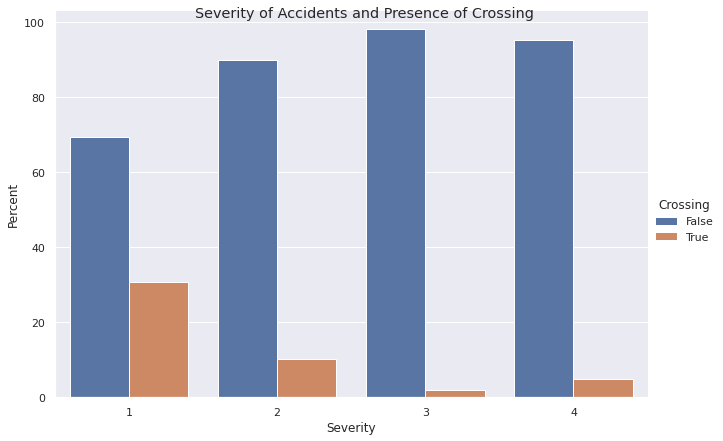

In [ ]:
sns.set()
df = data2
x,y = 'Severity', 'Crossing'

g = (df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Percent',hue=y,kind='bar', height = 6, aspect = 1.5));
g.fig.suptitle('Severity of Accidents and Presence of Crossing');

As with Traffic Signal, we observe a clear trend in the data regarding the relationship between the presence of a crossing and accident severity. As the Severity of accidents increases, the percentage of accidents where a Crossing is present decreases. This indicates that a crossing negatively impacts the Severity of an accident, and may actually reduce the rate of accidents. This observation aligns with our previous calculation of the correlation between Accident Severity and Crossing which resulted in a negative correlation of -0.14.

Stop

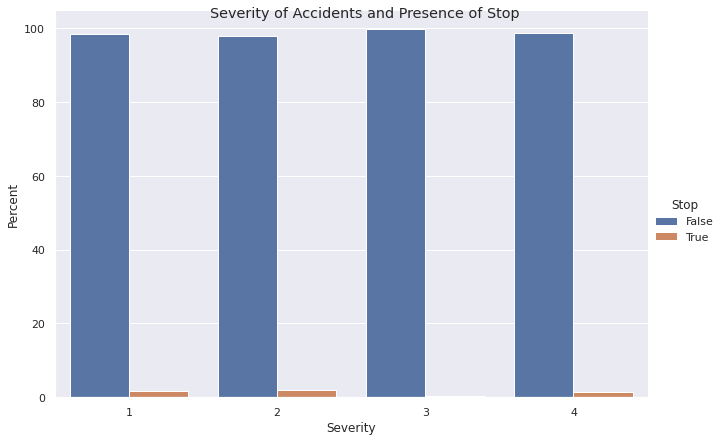

In [ ]:
sns.set()
df = data2
x,y = 'Severity', 'Stop'

g = (df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Percent',hue=y,kind='bar', height = 6, aspect = 1.5));
g.fig.suptitle('Severity of Accidents and Presence of Stop');

The plot above is difficult to read due to the very small percentage of accidents where a stop is present. This alone may indicate that Stops are good measures of accident prevention and have the potential to decrease the rate of accidents. However, we are interested in understanding the impact of Stops on accident severity. In order to better view this relationship we will compare the distribution of accident severity between accidents where a Stop was present and accidents where a Stop was not present.

In [ ]:
data_stop = data2[data2['Stop'] == True]
data_stop2 = data2[data2['Stop'] == False]

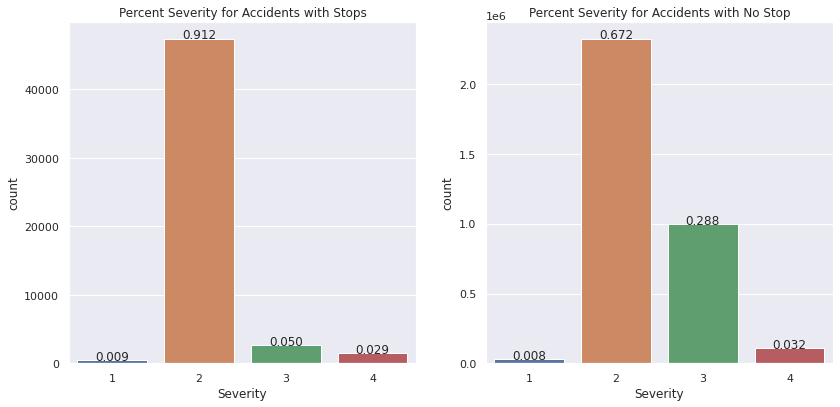

In [ ]:
fig, ax = plt.subplots(figsize=(13.7,6.27))

plt.subplot(1, 2, 1)
total = float(len(data_stop))
dg = sns.countplot(x="Severity", data=data_stop);
for p in dg.patches:
    height = p.get_height()
    dg.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}'.format(height/total),
            ha="center")
dg.set_title('Percent Severity for Accidents with Stops');

plt.subplot(1, 2, 2)
total2 = float(len(data_stop2))
dg2 = sns.countplot(x="Severity", data=data_stop2);
for p in dg2.patches:
    height = p.get_height()
    dg2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}'.format(height/total2),
            ha="center")
dg2.set_title('Percent Severity for Accidents with No Stop');

del(data_stop)
del(data_stop2)

This plot reveals that in fact the presence of a Stop decreases the Severity of an accident. We observe that in particular the percentage of Level 3 accidents decreases from 28% to 5% when a Stop is present. The percentage of Level 4 accidents also decreases slightly from 3.2% to 2.9%. This indicates that Stops are effective measures for decreasing the severity of accidents as well as the rate.

Amenity and Station

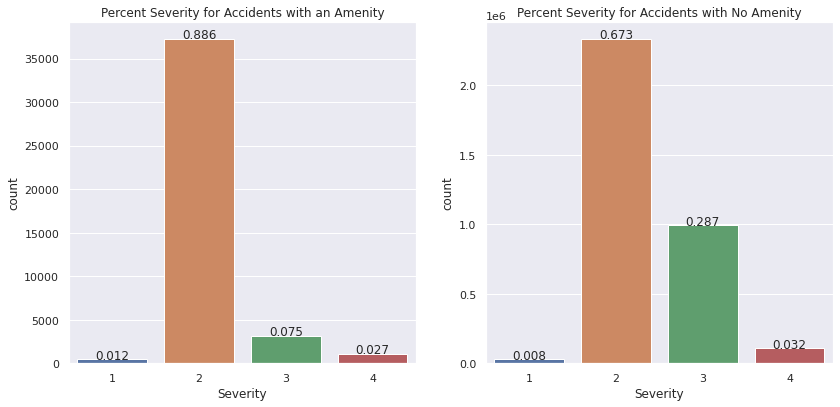

In [ ]:
data_amenity = data2[data2['Amenity'] == True]
data_amenity2 = data2[data2['Amenity'] == False]

fig, ax = plt.subplots(figsize=(13.7,6.27))

plt.subplot(1, 2, 1)
total = float(len(data_amenity))
dg = sns.countplot(x="Severity", data=data_amenity);
for p in dg.patches:
    height = p.get_height()
    dg.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}'.format(height/total),
            ha="center")
dg.set_title('Percent Severity for Accidents with an Amenity');

plt.subplot(1, 2, 2)
total2 = float(len(data_amenity2))
dg2 = sns.countplot(x="Severity", data=data_amenity2);
for p in dg2.patches:
    height = p.get_height()
    dg2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}'.format(height/total2),
            ha="center")
dg2.set_title('Percent Severity for Accidents with No Amenity');

del(data_amenity)
del(data_amenity2)

Both Amenities and Stations appear to reduce the Severity of Accidents. The percentage of accidents classified as Level 3 drops by nearly 20% when an Amenity or a Station is nearby. Similarly, the percentage of Level 4 accidents decreases by around 1% in both cases.

Traffic Signal and Crossing  

We conclude by examining the distributions of accident severity among datasets where our most significant factors (Traffic Signal and Crossing) have been combined.

In [ ]:
df = data_road[(data_road['Traffic_Signal']==True)&(data_road['Crossing']==True)]

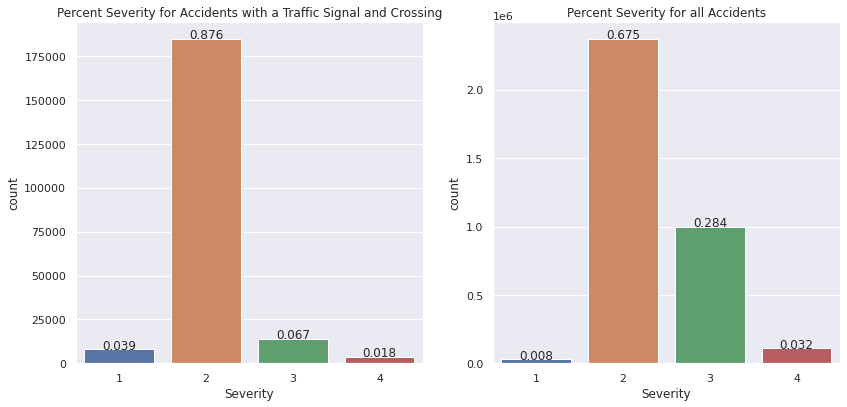

In [ ]:
fig, ax = plt.subplots(figsize=(13.7,6.27))

plt.subplot(1, 2, 1)
total = float(len(df))
dg = sns.countplot(x="Severity", data=df);
for p in dg.patches:
    height = p.get_height()
    dg.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}'.format(height/total),
            ha="center")
dg.set_title('Percent Severity for Accidents with a Traffic Signal and Crossing');

plt.subplot(1, 2, 2)
total2 = float(len(data_road))
dg2 = sns.countplot(x="Severity", data=data_road);
for p in dg2.patches:
    height = p.get_height()
    dg2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}'.format(height/total2),
            ha="center")
dg2.set_title('Percent Severity for all Accidents');

We note here a decrease in the percentrage of severe accidents. Level 3 and Level 4 accidents decrease by a combined nearly 25% when a Traffic Signal and Crossing are both present.

**Summary**  

As a part of our exploration of road conditions, we have obtained insight into potentially significant factors in influencing accident prevalence and accident severity. We have observed Bump, Roundabout, Turning Loop, Traffic Calming, and Stop to all be factors that potentially decrease the likelihood of an accident. We conclude this due to the very few instances in which these factors are present. However, we recognize that we have no control group to compare and this difference could be due to a rarity of these conditions. Given the obvious frequency of Stops and Bumps, we then believe these factors to potentially be the most influencial at decreasing accident rates.  

With respect to accident severity, we note two important factors, Traffic Signal and Crossing both of which decrease the likelihood of a severe accident. Junction is the only factor to increase (slightly) the likelihood of a severe accident.

## Machine Learning Modeling

In this section, we will transition from some preliminary exploration of trends in the data and begin to use Machine Learning as a tool to obtain insight into the relationships between attributes. In the previous section, we observed certain factors that are related to accident severity namely: Traffic Signal, Crossing, Junction, Stop, Temperature, and Precipitation. However, there is much to explore regarding the ways in which these factors interact, and further exploration using Machine Learning techiniques is required.  

For the purposes of our analysis, we will focus on regression analyses using Machine Learning techniques. We use regression because we have a target variable (Severity) and can therefore use the variables as predictors to evaluate the strength of their relationships with Severity. By identifying variables that are effective in combination as predictors of Severity, we can identify conditions in which road safety measures must be heighted and efforts must be focused, in order to best prevent motor vehicle accidents.

### Convert to Numeric Representation

To begin our analysis, we note that many of the variables in our dataframe are in fact non-numeric data. In order to perform a successful analysis, these variables should first be converted into numeric data. To achieve this conversion, we will implement a function that converts categorical data into numeric representations using unique IDs. The function will determine the number of unique entries for each column and represent these entries with a unique integer. This function 'convert_data' will be used in subsequent analyses.

In [ ]:
# define a function to convert a dataframe (df)
import numpy as np
def convert_data(df) :
    columns = df.columns
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x += 1
            
            df[column] = list(map(convert_to_int, df[column]))

    return df

### Regression Analysis

Based on our exploratory data analysis, we believe there to be certain characteristics of weather and road conditions that lead to higher rates of accidents and of accident severity. Therefore, the as a next step in our analysis, we will use Machine Learning Regression Models to explore the strength of these potential relationships. We are hoping to gain more insight regarding significant predictors as well as evaluate whether there are relationships strong enough to build successful regression models.  

The target variable of our regression models will be a measure of severity. For logistic models the target variable will be Severity itself. For linear models, the target variable will be Duration. In either case, the model is affected significantly by the imbalanced dataset with regards to Severity, as explored earlier. There are a far greater number of accidents classified as Severity Level 2 than any of the other three levels. This means that our model will not have enough information pertaining to any of the other classes to properly train and will therefore be uneffective at classifying new data. There are several ways to solve this problem. The best way is to collect more data. However, that is not possible for us to do. Therefore, we will ameliorate the problem by using Random Over Sampling and Random Under Sampling techniques. We will under sample from classes with larger numbers of instances and over sample from classes with fewer numbers of instances until all classes are of similar sizes. For the purposes of our analysis, we will be using the RandomUnderSampler and SMOTE methods to under sample and over sample our data.

**Selecting Best Features**

To begin we will explore which features are the best predictors of accident severity. Since our dataset has many attributes, it is in our best interest to narrow our analysis by removing irrelevant features that could impact the performance of our model and therefore cloud our analysis. We will use three methods to determine which features might serve as the best predictors, keeping in mind our findings in the previous section.

First, we use a correlation heatmap to view which features are highly correlated. We are particularly interested in detecting attributes that are correlated to Severity and Duration as those will be our target variables.

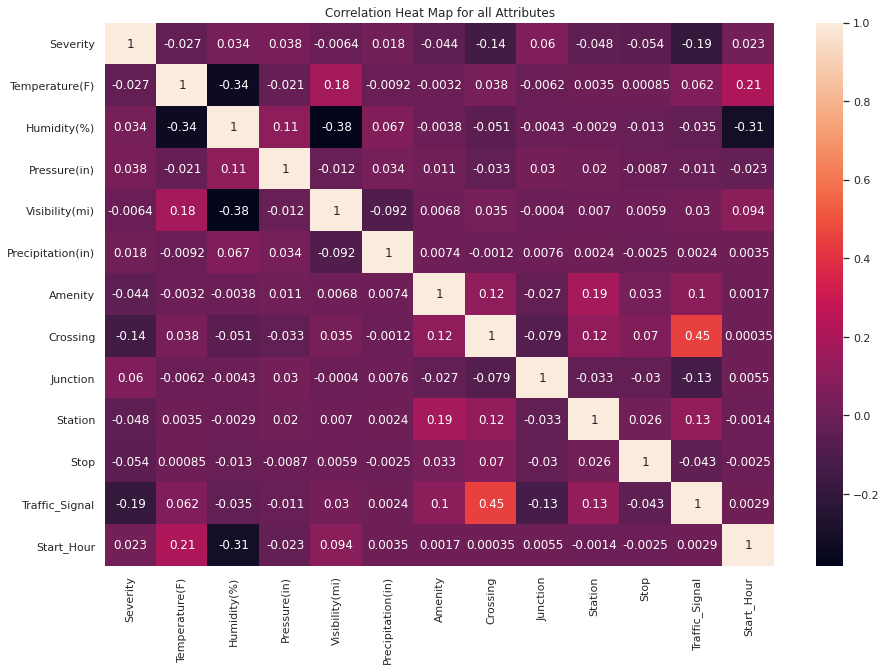

In [ ]:
#get correlations of each features in dataset
corrmat = data2.drop(columns = ['State','ID','County','Start_Lat','Start_Lng','Wind_Speed(mph)','Railway','Turning_Loop','Bump','Traffic_Calming','Give_Way','No_Exit','Roundabout','Day','Duration(min)','Distance(mi)']).corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,10))
#plot heat map
g=sns.heatmap(data2[top_corr_features].corr(),annot=True).set_title('Correlation Heat Map for all Attributes');

From this correlation map we note the following attributes as potential strong indicators of accident severity: Traffic Signal, Crossing, Stop, Humidity, Pressure, and Temperature. All of these attributes have weak correlations with Severity, but they are stronger than the rest of the attributes.  

We also make important observations regarding correlation between attributes. Most notably, Traffic Signal and Crossing are fairly strongly correlated. Temperature and Humidity as well as Visibility and Humidity are both somewhat strongly negatively correlated. Amenity and Station, and Temperature and Start Hour both have moderate postive correlations. We make note of this multicollinearity because we will now avoid using these combinations of variables in the models we train and test.

Next, we will use an ANOVA statistical test to rank the attributes that best predict Accident Severity.  

We note here that for the remaining analysis, we will often make use of random samples subset from the whole dataset in order to preform the analysis. The dataset has over 3 million instances which, for a personal laptop, is a lot to analyze. However, due to this extremely large number of samples, we can select a random sample and assume it to be representative of the dataset as a whole.  

In the following analysis of the best attributes, we will use a random sample of size n = 1,000,000.

In [ ]:
#specify the dataframe to convert
df = data_weather
df.apply(pd.to_numeric, errors='ignore')
df['Precipitation(in)'].fillna(0)
df = df.dropna()
df = df.sample(n = 1000000, random_state = 42)
df = convert_data(df)

# Assign the data
df=df.drop(columns = ['State','ID','County','Duration(min)','Distance(mi)'])

# Set the target for the prediction
target='Severity'

# Create arrays for the features and the response variable
# set X and y
y = df[target]
X = df.drop(target, axis=1)

#apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=f_classif, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print best features

               Specs        Score
1        Humidity(%)  3897.637820
0     Temperature(F)  1594.170002
3     Visibility(mi)   959.778746
5     Sunrise_Sunset   886.422509
2       Pressure(in)   573.255017
4  Precipitation(in)   282.028927


The results of this test indicate that the strongest predictors of Accident Severity are Humidity and Temperature. Precipitation is the weakest predictor. We now repeat this process and evaluate the road condition factors.

In [ ]:
#specify the dataframe to convert
df = data_road
df.apply(pd.to_numeric, errors='ignore')
df = df.dropna()
df = df.sample(n = 1000000, random_state = 42)
df = convert_data(df)

# Assign the data
df=df.drop(columns = ['State','ID','County','Duration(min)','Distance(mi)'])

# Set the target for the prediction
target='Severity'

# Create arrays for the features and the response variable
# set X and y
y = df[target]
X = df.drop(target, axis=1)

#apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=f_classif, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print best features

            Specs         Score
5  Traffic_Signal  14977.562901
1        Crossing   8644.035795
4            Stop   1363.742784
2        Junction   1318.119955
3         Station    965.972351
0         Amenity    910.368705


Unsurprisingly, Traffic Signal and Crossing are the strongest predictors. This test indicates that Traffic Signal may be a stronger predictor than Crossing and therefore we will include this in the model and not Crossing (due to their correlation). We also note that Stop and Junction are weaker, but somewhat strong predictors.

**Logistic Regression for Severity**

Before performing a logistic regression analysis, we must check the assumptions of this analysis and ensure that our data reasonably meets these assumptions. 

Assumptions:
1.   *The output is categorical.* <br>
    The target variable of our regression model is Severity which is a categorical datatype. Therefore in each case this assumption is satisfied.
2.  *Independence of observations.* <br>
    We can safely assume that this assumption is satisfied. The observations of this dataset are accidents. These accidents are isolated instances and are therefore nearly independent. 
3.  *Independence between features.* <br>
    With this assumption, we must confirm that there is no high collinearity between the predictors. We can conclude that this assumption is satisfied based on our previous examination of the correlation heatmap.
4.  *Linear Relationship between the logit of the outcome and each predictor variable* <br>
    We will safely assume that this assumption has been satisfied with our given dataset.
5.  *Large dataset* <br>
    We are pulling from a large set of observations and therefore this assumption is satisfied.


Next we will create a dataframe that contains only the attributes we will test as predictors. We select these combinations based on our exploratory data analysis and in order to avoid significant correlation between predictors.  

*Model 1: Traffic Signal, Stop, Junction, Sunrise/Sunset, Humidity,Visibility, Station* 

Next we will split this dataframe into a training and testing set using a 1/5 split. In order to create a more even distribution among the target variable (Severity) we will using a combination of undersampling and oversampling until the Severity classes are more equal. We take care to only perform this under and over sampling on the training set to preserve the repeatability of the test results.

In [ ]:
#create the dataframe for Model 1
model1_data = data_weather.drop(columns = ['State','County','Distance(mi)','Duration(min)','Temperature(F)','Pressure(in)','Precipitation(in)'])
df = data_road.drop(columns = ['Severity','State','County','Amenity','Crossing','Duration(min)','Distance(mi)'])
model1_data = pd.merge(model1_data, df, on = 'ID',how = 'inner')
model1_data = model1_data.drop(columns = ['ID'])
model1_data.head()

,Severity,Humidity(%),Visibility(mi),Sunrise_Sunset,Junction,Station,Stop,Traffic_Signal
0,3,91.0,10.0,Night,False,False,False,False
1,2,100.0,10.0,Night,False,False,False,False
2,2,100.0,10.0,Night,False,False,False,True
3,3,96.0,9.0,Night,False,False,False,False
4,2,89.0,6.0,Day,False,False,False,True


Evaluation Model 1:  

We will evaluate the performance of Model 1 using two types of Logistic Regression: Softmax Logistic Regression and K-Neighbors Classification.

In [ ]:
#specify the dataframe to convert to numerical representation
df = model1_data
df.apply(pd.to_numeric, errors='ignore')
df.fillna(0,inplace = True) #replace NaN values with 0s
df = convert_data(df)

In [ ]:
df = df.sample(n = 750000, random_state = 21)

# Set the target for the prediction
target='Severity'

# Create arrays for the features and the response variable

# set X and y
y = df[target]
X = df.drop(target, axis=1)

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

print(Counter(y_train))

Counter({2: 405378, 3: 170593, 4: 19086, 1: 4943})


In [ ]:
# define oversampling strategy
over = SMOTE(sampling_strategy={1:75000, 4:100000},random_state = 42)
# fit and apply the transform
X_train, y_train = over.fit_resample(X_train, y_train)
# summarize class distribution
print(Counter(y_train))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy={2:150000,3:125000}, random_state = 42)
# fit and apply the transform
X_train, y_train = under.fit_resample(X_train, y_train)
# summarize class distribution
print(Counter(y_train))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({2: 405378, 3: 170593, 4: 100000, 1: 75000})
Counter({2: 150000, 3: 125000, 4: 100000, 1: 75000})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)

# Fit the classifier to the data
knn.fit(X_train,y_train)

# Predict the labels for the training data X
y_pred = knn.predict(X_test)

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

print('[K-Nearest Neighbors (KNN)] knn.score: {:.3f}.'.format(knn.score(X_test, y_test)))
print('[K-Nearest Neighbors (KNN)] accuracy_score: {:.3f}.'.format(acc))

[K-Nearest Neighbors (KNN)] knn.score: 0.619.
[K-Nearest Neighbors (KNN)] accuracy_score: 0.619.


The result of our K-Nearest Neighbors regression model using the attributes in Model 1 is an accuracy of 0.619. This is not very strong, however, the model is able to classify over half of the instances accurately which indicates that there are relationships at play among the variables that inform accident severity levels.  

We will now perform a 2-fold Cross-Validation to see how robust our performance is.

In [ ]:
from sklearn.model_selection import cross_val_score
print(np.mean(cross_val_score(knn, X, y, cv=2)))
print(round(np.var(cross_val_score(knn, X, y, cv=2)),1))

0.640564
0.0


The results of our 2-Fold Cross Validation indicate that our model's performance is fairly robust.

Next, we fit a SoftMax Logistic Regression model.

Misclassified samples: 83867
Accuracy: 0.44
Confusion matrix, without normalization
[[  359   428   329   120]
 [ 6598 51986 23602 19159]
 [  892 18533 12191 11032]
 [  120  1843  1211  1597]]
Normalized confusion matrix
[[0.29045307 0.34627832 0.26618123 0.09708738]
 [0.06510435 0.51296068 0.23288766 0.18904731]
 [0.0209154  0.43455731 0.28585162 0.25867567]
 [0.02515196 0.38629218 0.25382519 0.33473066]]


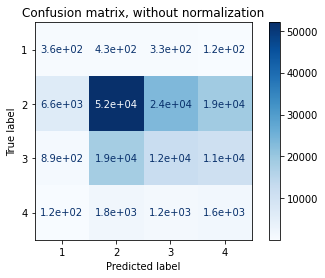

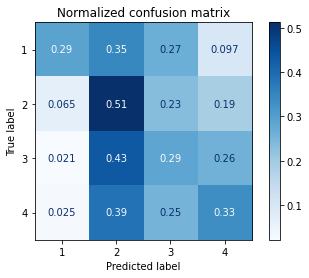

In [ ]:
#standardize the data
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# train a softmax model on the training dataset
model = LogisticRegression(random_state=42, multi_class = 'multinomial')
model.fit(X_train, y_train)

# use the model to make predictions with the test data
y_pred = model.predict(X_test)
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

#plot a confusion matrix with the test set
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    plt.grid(False)
    print(title)
    print(disp.confusion_matrix)

plt.show()

Our SoftMax Logistic Regression Model is much weaker than our K-Nearest Neighbors model with an accuracy of 0.44 it classifies less than half the instances correctly. We see from the confusion matrix that our model over predicts Severity Levels 2 and 3. This is due to the greater number of instances of both of those classes. The fact that the model's best performance, predicting Level 2 accurately, is still only just under 0.5 indicates that the model is not very accurate in any sense. The results of this Logistic Regress give us pause in terms of whether the attributes are significant predictors. However, without a better distribution of instances to train and test on, we cannot be sure.

Subsetting by County

In the previous section we created a smaller sample of the dataset to run our regression on by randomly sampling from the entire dataset. While this ensures a random subset, we hypothesize that our models may be more accurate if we control for some of the variation in the data by subsetting by a specific region. Different regions of the US have different features and environments that might impact the strength of predictors. Furthermore, we have seen already how features of counties can impact the accident rate. Therefore, in this section we will subset the data by Greenville County, SC (selected because South Carolina has the highest accident rates) and train and test a regression model. We will use the K-Nearest Neighbors (KNN) regression model because it performed much better on the previous data.

In [ ]:
#create the county subset dataframe
county_data = data_weather.drop(columns = ['State','Distance(mi)','Duration(min)','Pressure(in)','Temperature(F)', 'Precipitation(in)'])
df = data_road.drop(columns = ['Severity','State','County','Amenity','Crossing','Duration(min)','Distance(mi)'])
county_data = pd.merge(county_data, df, on = 'ID',how = 'outer')
county_data = county_data.drop(columns = ['ID'])
county_data.head()

,Severity,County,Humidity(%),Visibility(mi),Sunrise_Sunset,Junction,Station,Stop,Traffic_Signal
0,3,Montgomery,91.0,10.0,Night,False,False,False,False
1,2,Franklin,100.0,10.0,Night,False,False,False,False
2,2,Clermont,100.0,10.0,Night,False,False,False,True
3,3,Montgomery,96.0,9.0,Night,False,False,False,False
4,2,Montgomery,89.0,6.0,Day,False,False,False,True


In [ ]:
county_data = county_data[county_data['County']=='Greenville']
county_data.apply(pd.to_numeric, errors='ignore')
county_data.fillna(0,inplace = True) #replace NaN values with 0s
county_data = convert_data(county_data)

In [ ]:
# Set the target for the prediction
df = county_data
target='Severity'

# Create arrays for the features and the response variable

# set X and y
y = df[target]
X = df.drop(target, axis=1)

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

print(Counter(y_train))

Counter({2: 18202, 3: 3474, 4: 66, 1: 5})


In [ ]:
# define oversampling strategy
over = SMOTE(sampling_strategy={1:7000, 4:9000, 3:10000},k_neighbors = 3, random_state = 42)
# fit and apply the transform
X_train, y_train = over.fit_resample(X_train, y_train)
# summarize class distribution
print(Counter(y_train))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy={2:10000}, random_state = 42)
# fit and apply the transform
X_train, y_train = under.fit_resample(X_train, y_train)
# summarize class distribution
print(Counter(y_train))

Counter({2: 18202, 3: 10000, 4: 9000, 1: 7000})
Counter({2: 10000, 3: 10000, 4: 9000, 1: 7000})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X_train,y_train)

# Predict the labels for the training data X
y_pred = knn.predict(X_test)

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

print('[K-Nearest Neighbors (KNN)] knn.score: {:.3f}.'.format(knn.score(X_test, y_test)))
print('[K-Nearest Neighbors (KNN)] accuracy_score: {:.3f}.'.format(acc))

[K-Nearest Neighbors (KNN)] knn.score: 0.643.
[K-Nearest Neighbors (KNN)] accuracy_score: 0.643.


Our initial evaluation of the model shows an accuracy of 0.643 which slightly higher than the model trained on our random sample. This performance is using a value of n_neighbors = 10. In order to explore just how accurate the model can be we will perform some hyperparameter tuning as follows:

Minimum error:- 0.2883943351112746


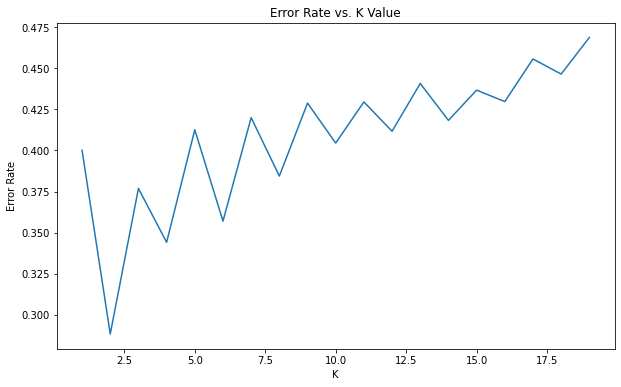

In [ ]:
error_rate = []
for i in range(1,20):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate, markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate))

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=2)

# Fit the classifier to the data
knn2.fit(X_train,y_train)

# Predict the labels for the training data X
y_pred = knn2.predict(X_test)

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

print('[K-Nearest Neighbors (KNN)] knn2.score: {:.3f}.'.format(knn2.score(X_test, y_test)))
print('[K-Nearest Neighbors (KNN)] accuracy_score: {:.3f}.'.format(acc))

[K-Nearest Neighbors (KNN)] knn2.score: 0.712.
[K-Nearest Neighbors (KNN)] accuracy_score: 0.712.


Perform a 5-Fold Cross Validation on the KNN model.

In [ ]:
from sklearn.model_selection import cross_val_score
print(np.mean(cross_val_score(knn, X, y, cv=5)))
print(round(np.var(cross_val_score(knn, X, y, cv=5)),4))

0.8308931810126104
0.0


From our plot we see that the lowest error occurs around n_neighbors = 2. Indeed when we fit our model using n_neighbors = 2, we achieve an accuracy score of 0.712 which is significantly higher than our original 0.643. Both our KNN model accuracy and the results of our 5-Fold Cross Validation show that we are indeed able to train a slightly more accurate model using the same attributes after subsetting by county. This result is promising because it indicates that given a specific client who is interested in a particular county or region, we will be able to extract even more specific insights about accident prevalency.

# Part V. Conclusion and Deployment

The goal of our analysis was to explore factors that lead to higher accident rates and higher rates of severe accidents. We explored data containing different road and weather conditions at the sight of accidents across the United States. Based on our analysis we make the following conclusions:  

**What Did We Observe?**  

First we observe some trends in accident rates among states. South Carolina and Oregon in particular display high rates of accidents per 1000 residents. Furthermore, the Southeast and Midwest regions appear to have higher rates of accidents. We observe also that communities with higher rates of public transport and lower rates of driving commutes record fewer accidents.

General Conditions: The highest rates of accidents occur during weekdays during the morning and evening commuting hours. However, accidents tend to be more severe accidents occur on weekends and during the middle of the night.  

Road Conditions: Road conditions that decrease the rate of accidents are most notably the presence of Stops and Bumps. Traffic Signals and Crossings decrease the severity of accidents that occur in nearby locations. On the other hand, Junctions seem to increase the severity of nearby accidents.  

Weather Conditions: Weak relationships between Temperature, Humidity and Severity were observed. As Humidity increases, accident severity increases, and as temperature decreases, accident severity increases. Somewhat suprisingly no weather conditions displayed strong correlation to accidents or accident severity. This is most likely due to limitations in how the data was collected. Also, we believe weather to be most significant at causing accidents in extreme forms, however, for a nationwide dataset such as the one we used, extreme weather occurrences are rare and therefore their significance is not clear in the data.  

Our machine learning model was able to relatively successfully predict accident severity using the most significant factors discussed above. This performance supports our conclusion that there is a relationship to note between the variables.  

**What is Next?**

Based on our insights above we can make the following recommendations to clients interested in preventing accidents and decreasing accident severity.  



1.   Accident prevention measures should focus on late night driving on weekends. This could potentially include driving under the influence and driving fatigued education initiatives.
2.   Stops, Speed Bumps, and Roundabouts could be implemented in areas of frequent accidents in order to decrease the rate.
3.   More Traffic Lights and Crossings in areas of frequent accidents can reduce accident severity.  
4.   Regions with high rainfall, high humidity, or low temperatures should further investigate the effect of weather on accident rates and should explore preventative measures to counteract the increased risk.  

In regards to where to begin, we would reach out to the states with the highest accident rates per 1000 residents in order to encourage a pointed approach to reducing this statistic. In addition, more specific recommendations can be provided based on a specific County or State, as displayed by the performance of the Machine Learning model on Greenville County, SC.



# Part VI. References

- Centers for Disease Control and Prevention (CDC), [*Cost Data and Prevention Policies*](https://www.cdc.gov/transportationsafety/costs/index.html?CDC_AA_refVal=https%3A%2F%2Fwww.cdc.gov%2Fmotorvehiclesafety%2Fcosts%2Findex.html), November 2020

- Moosavi, S. [*US Accidents (3.5 million records)*](https://www.kaggle.com/sobhanmoosavi/us-accidents), Version 6. 2020 

- Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. [*A Countrywide Traffic Accident Dataset.*](https://arxiv.org/abs/1906.05409), 2019.

- Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. [*Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights.*](https://arxiv.org/abs/1909.09638), 2019.

- Muon, Neutrino. [*US Census Dempgraphic Data*](https://www.kaggle.com/muonneutrino/us-census-demographic-data), Version 3. 2018

- National Highway Traffic Safety Administration (NHTSA), [*2019 Fatality Data Show Continued Annual Decline in Traffic Deaths*](https://www.nhtsa.gov/press-releases/2019-fatality-data-traffic-deaths-2020-q2-projections), October 2020

**Link To YouTube Video Explanation**

In [ ]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://youtube.com/embed/IXMQVvu-zYY" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')